In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image
#from sklearn.model_selection import KFold
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

import missingno as msno


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=( 10, 8))

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/train.csv')
hi = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/train.csv')
test = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/test.csv')

In [4]:
data['FOPTIMETHGLY'].value_counts()

0.0     1954
1.0     1834
2.0       90
3.0        8
13.0       1
7.0        1
5.0        1
10.0       1
Name: FOPTIMETHGLY, dtype: int64

# 데이터 유형 확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

# profiling

In [6]:
#!pip install pandas_profiling

import pandas_profiling
profile_report = pandas_profiling.ProfileReport(data)
profile_report

# 결측치 확인

In [7]:
# 비율로 확인 
missing_value = data.isna().sum()
total = data.shape[0]
ratio = round(missing_value/total,2)
print(round(missing_value/total,2))
ratio.sort_values(ascending=False).head(17).index
#  ['U4', 'U6', 'U14', 'U20', 'U50', 'U100', 'U75', 'U25', 'V100', 'FH2O',
#        'FOXID', 'FUEL', 'FOPTIMETHGLY', 'FSO4', 'FTBN', 'SOOTPERCENTAGE',
#        'FNOX'] --> 결측치 70% 이상 

ID                     0.00
COMPONENT_ARBITRARY    0.00
ANONYMOUS_1            0.00
YEAR                   0.00
SAMPLE_TRANSFER_DAY    0.00
ANONYMOUS_2            0.00
AG                     0.00
AL                     0.00
B                      0.00
BA                     0.00
BE                     0.00
CA                     0.00
CD                     0.10
CO                     0.00
CR                     0.00
CU                     0.00
FH2O                   0.72
FNOX                   0.72
FOPTIMETHGLY           0.72
FOXID                  0.72
FSO4                   0.72
FTBN                   0.72
FE                     0.00
FUEL                   0.72
H2O                    0.00
K                      0.16
LI                     0.00
MG                     0.00
MN                     0.00
MO                     0.00
NA                     0.00
NI                     0.00
P                      0.00
PB                     0.00
PQINDEX                0.00
S                   

Index(['U4', 'U6', 'U14', 'U20', 'U50', 'U100', 'U75', 'U25', 'V100', 'FH2O',
       'FOXID', 'FUEL', 'FOPTIMETHGLY', 'FSO4', 'FTBN', 'SOOTPERCENTAGE',
       'FNOX'],
      dtype='object')

In [8]:
data['FOPTIMETHGLY'].value_counts()

0.0     1954
1.0     1834
2.0       90
3.0        8
13.0       1
7.0        1
5.0        1
10.0       1
Name: FOPTIMETHGLY, dtype: int64

<Figure size 720x1080 with 0 Axes>

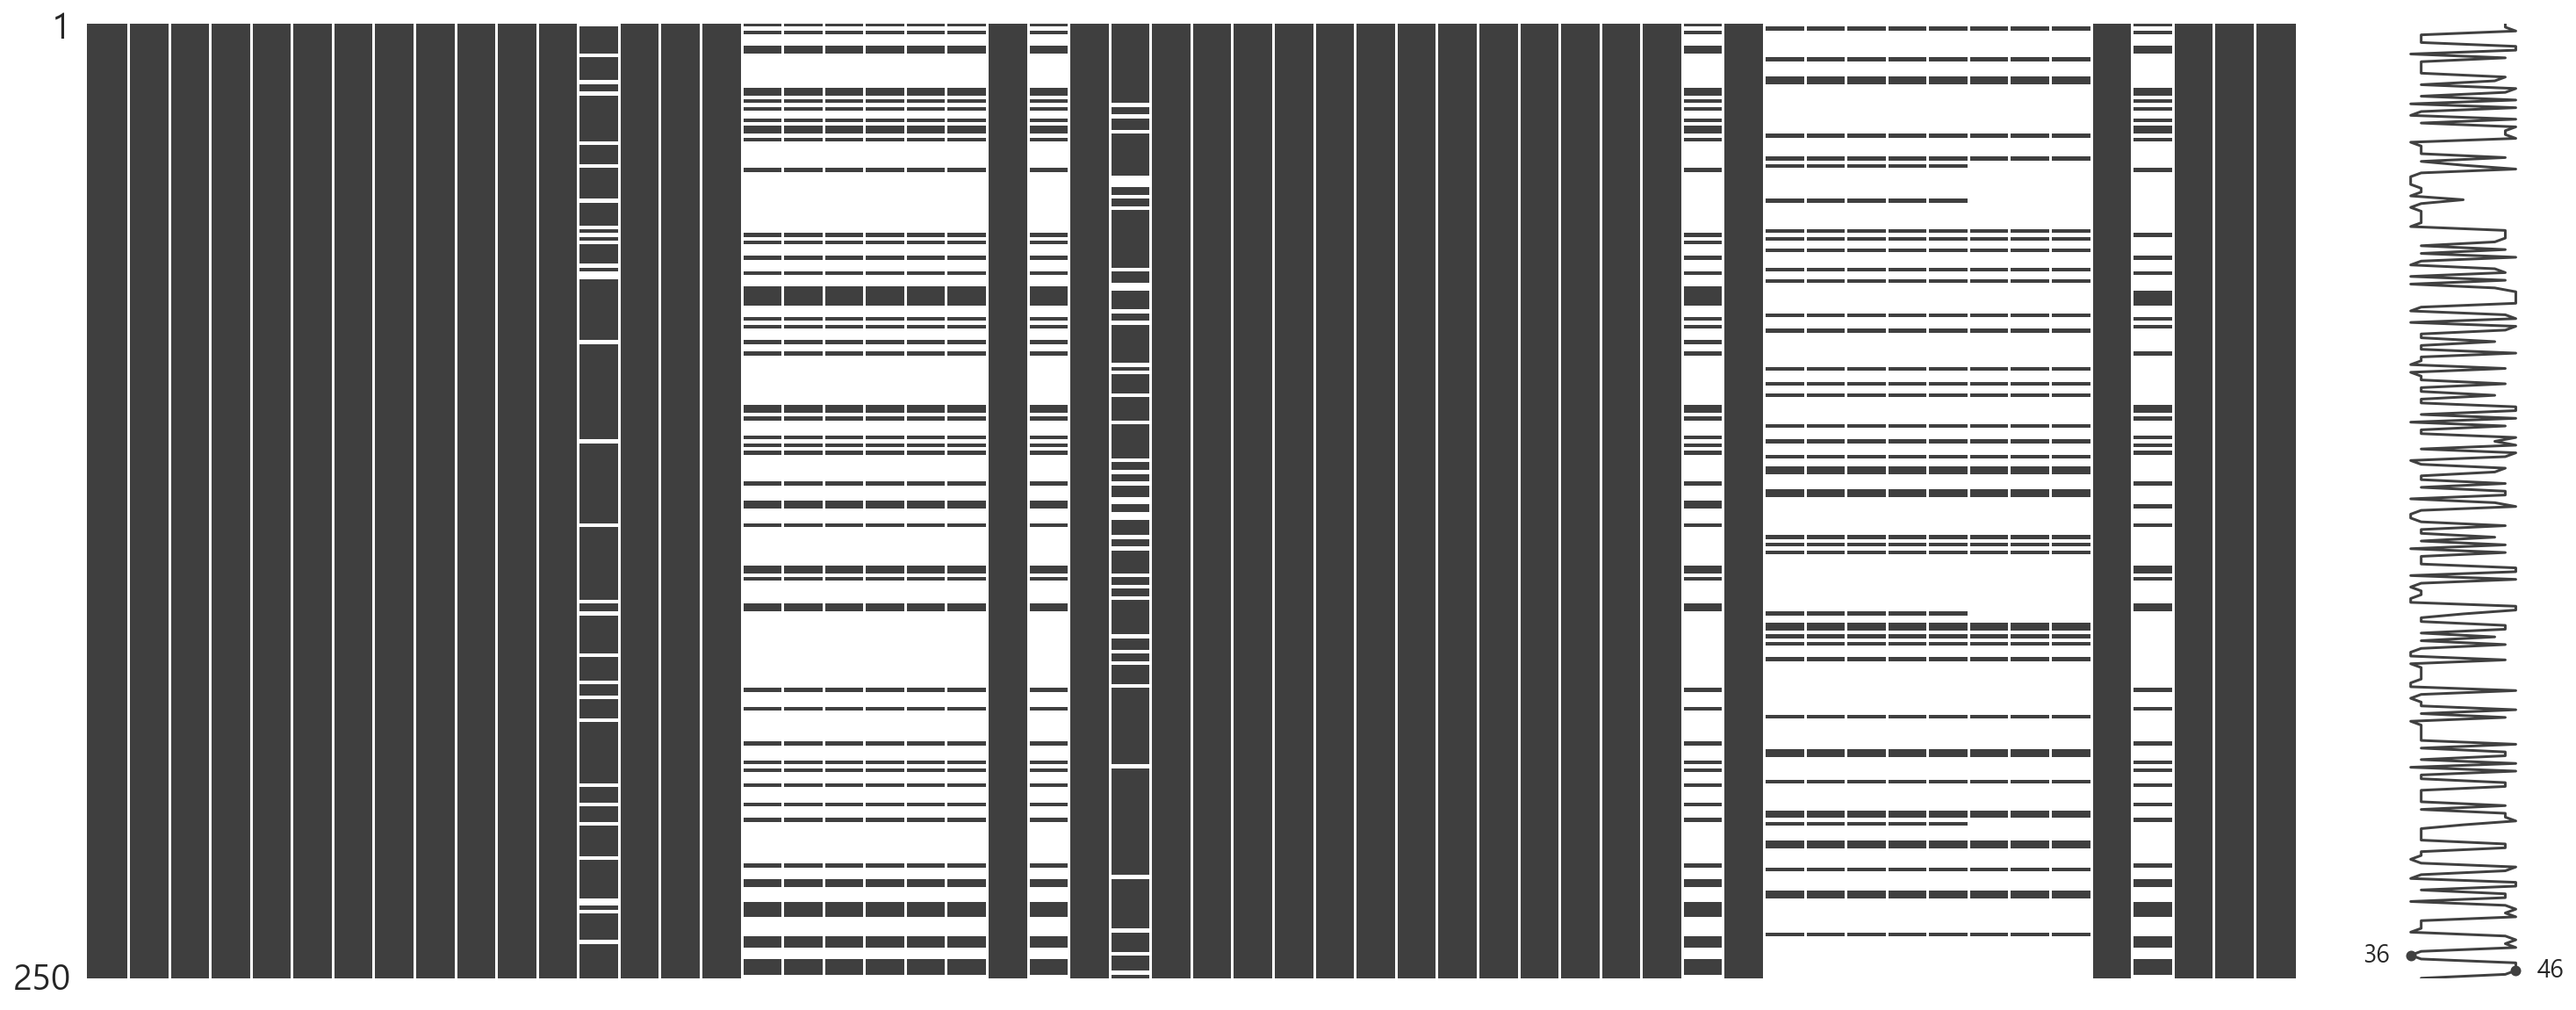

In [9]:
# 결측치 시각화 
plt.figure(figsize=(10,15))
msno.matrix(data.sample(250))
plt.show()

<AxesSubplot:>

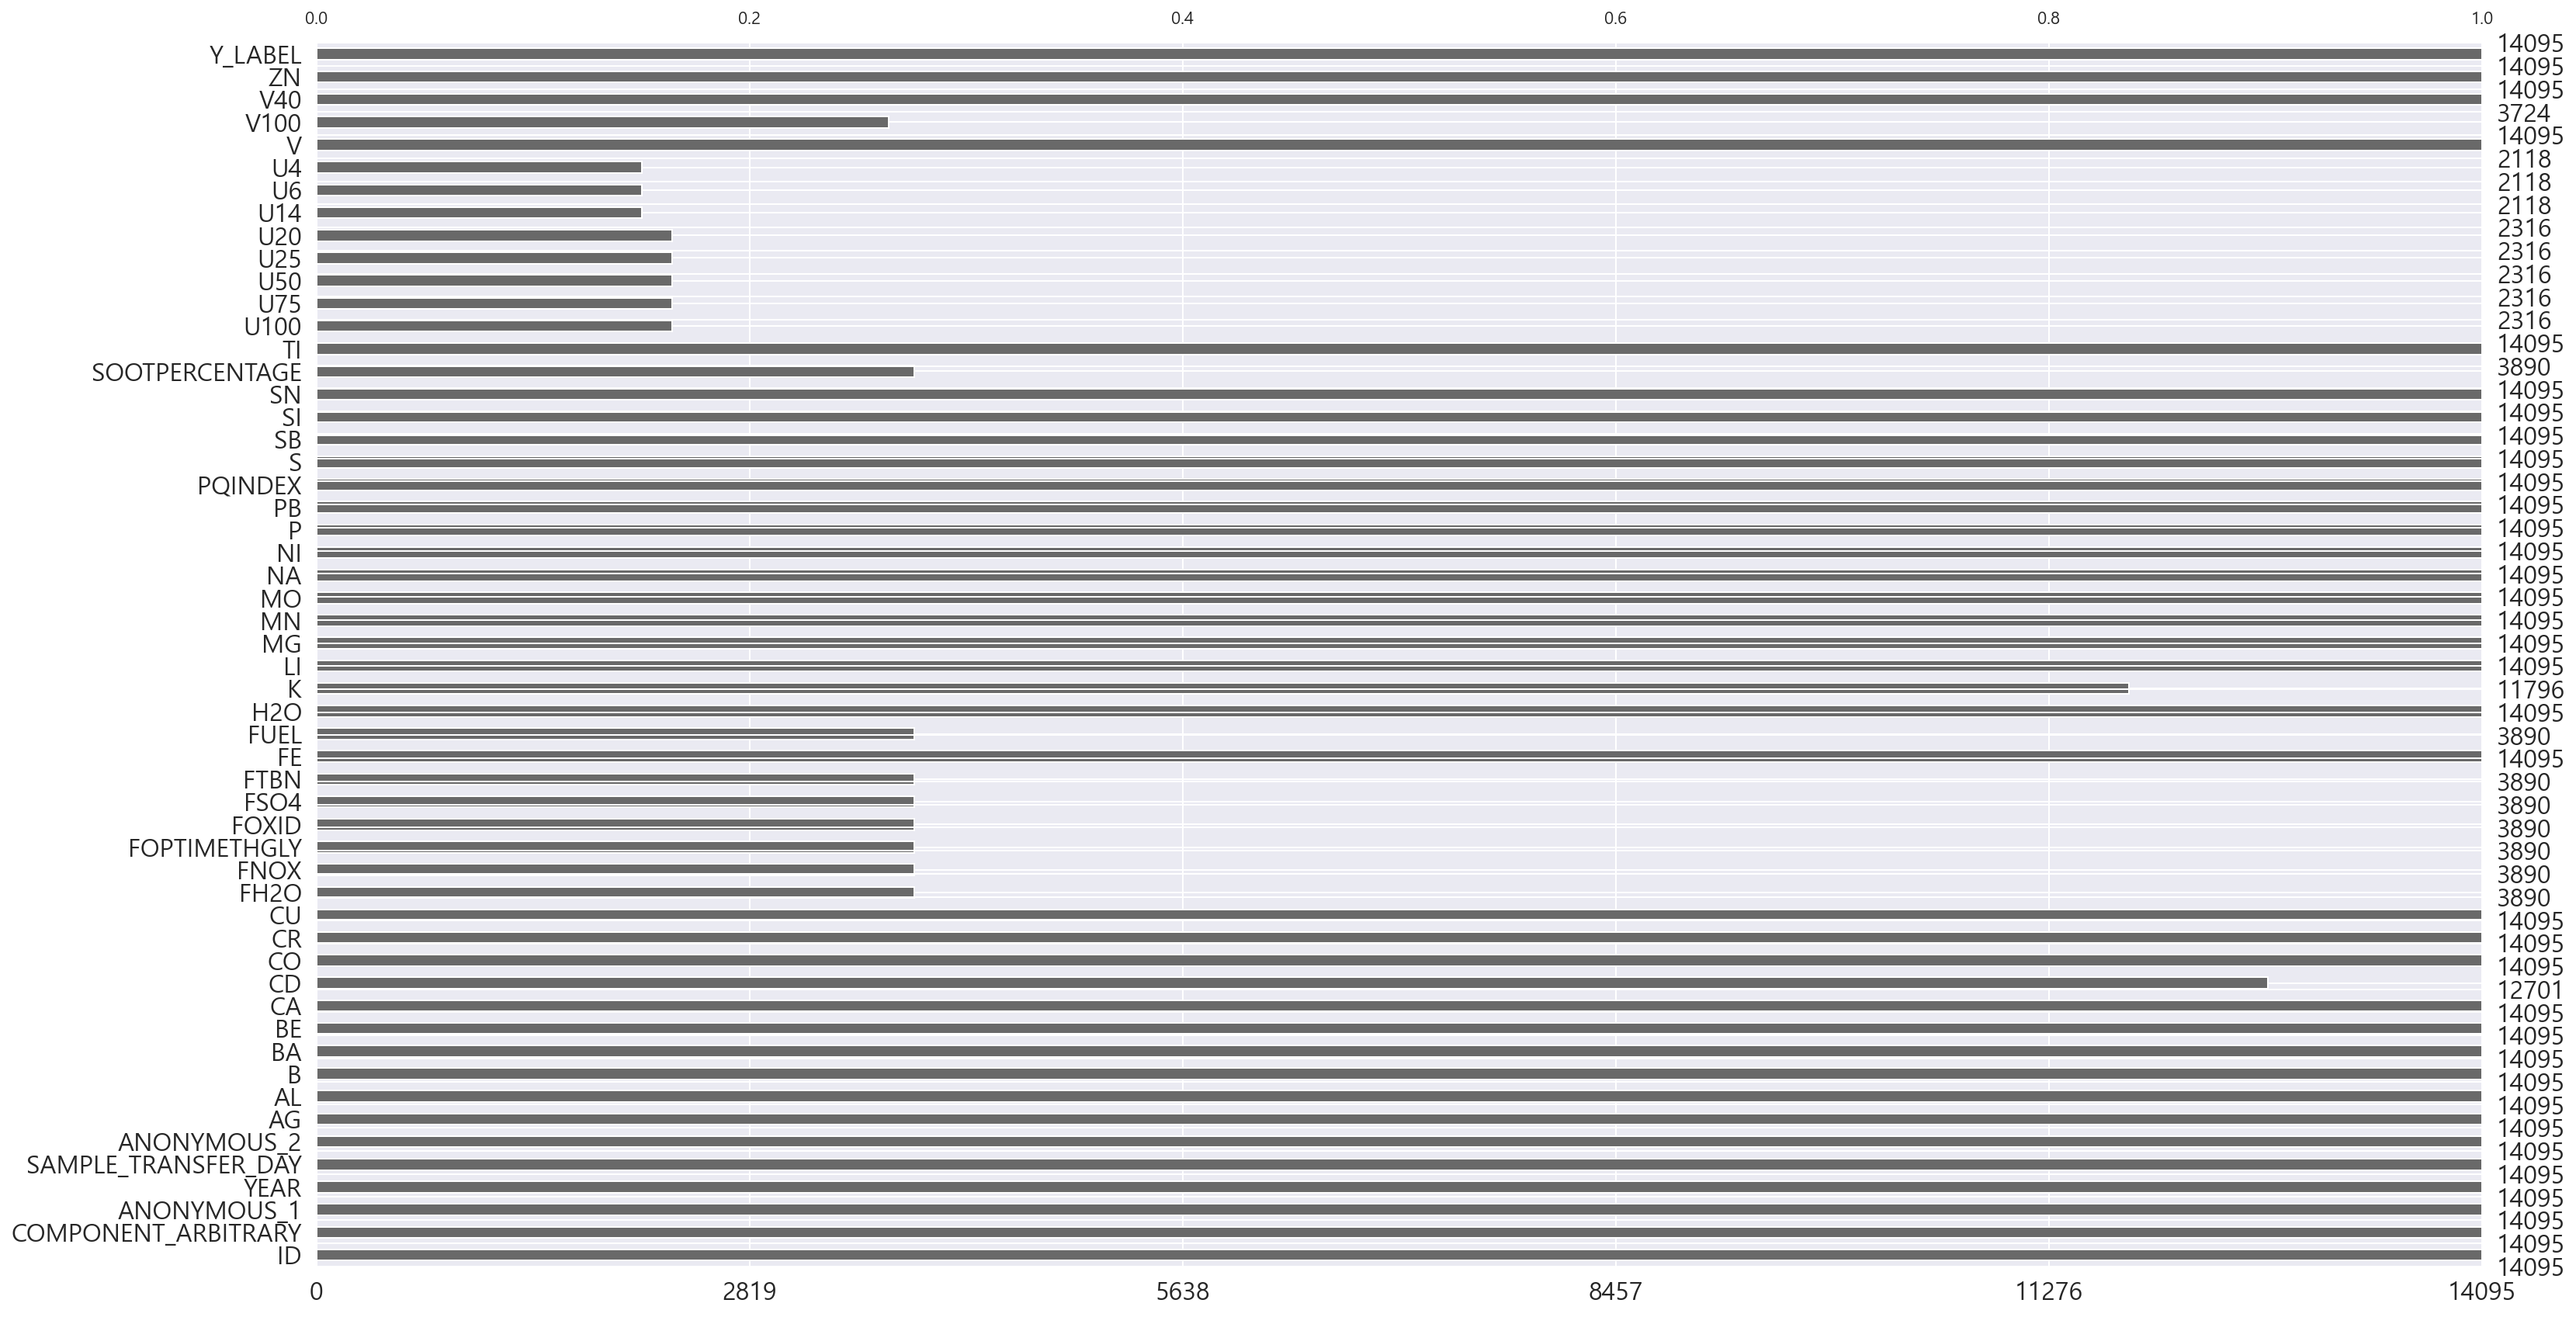

In [10]:
# bar
msno.bar(data)

<AxesSubplot:>

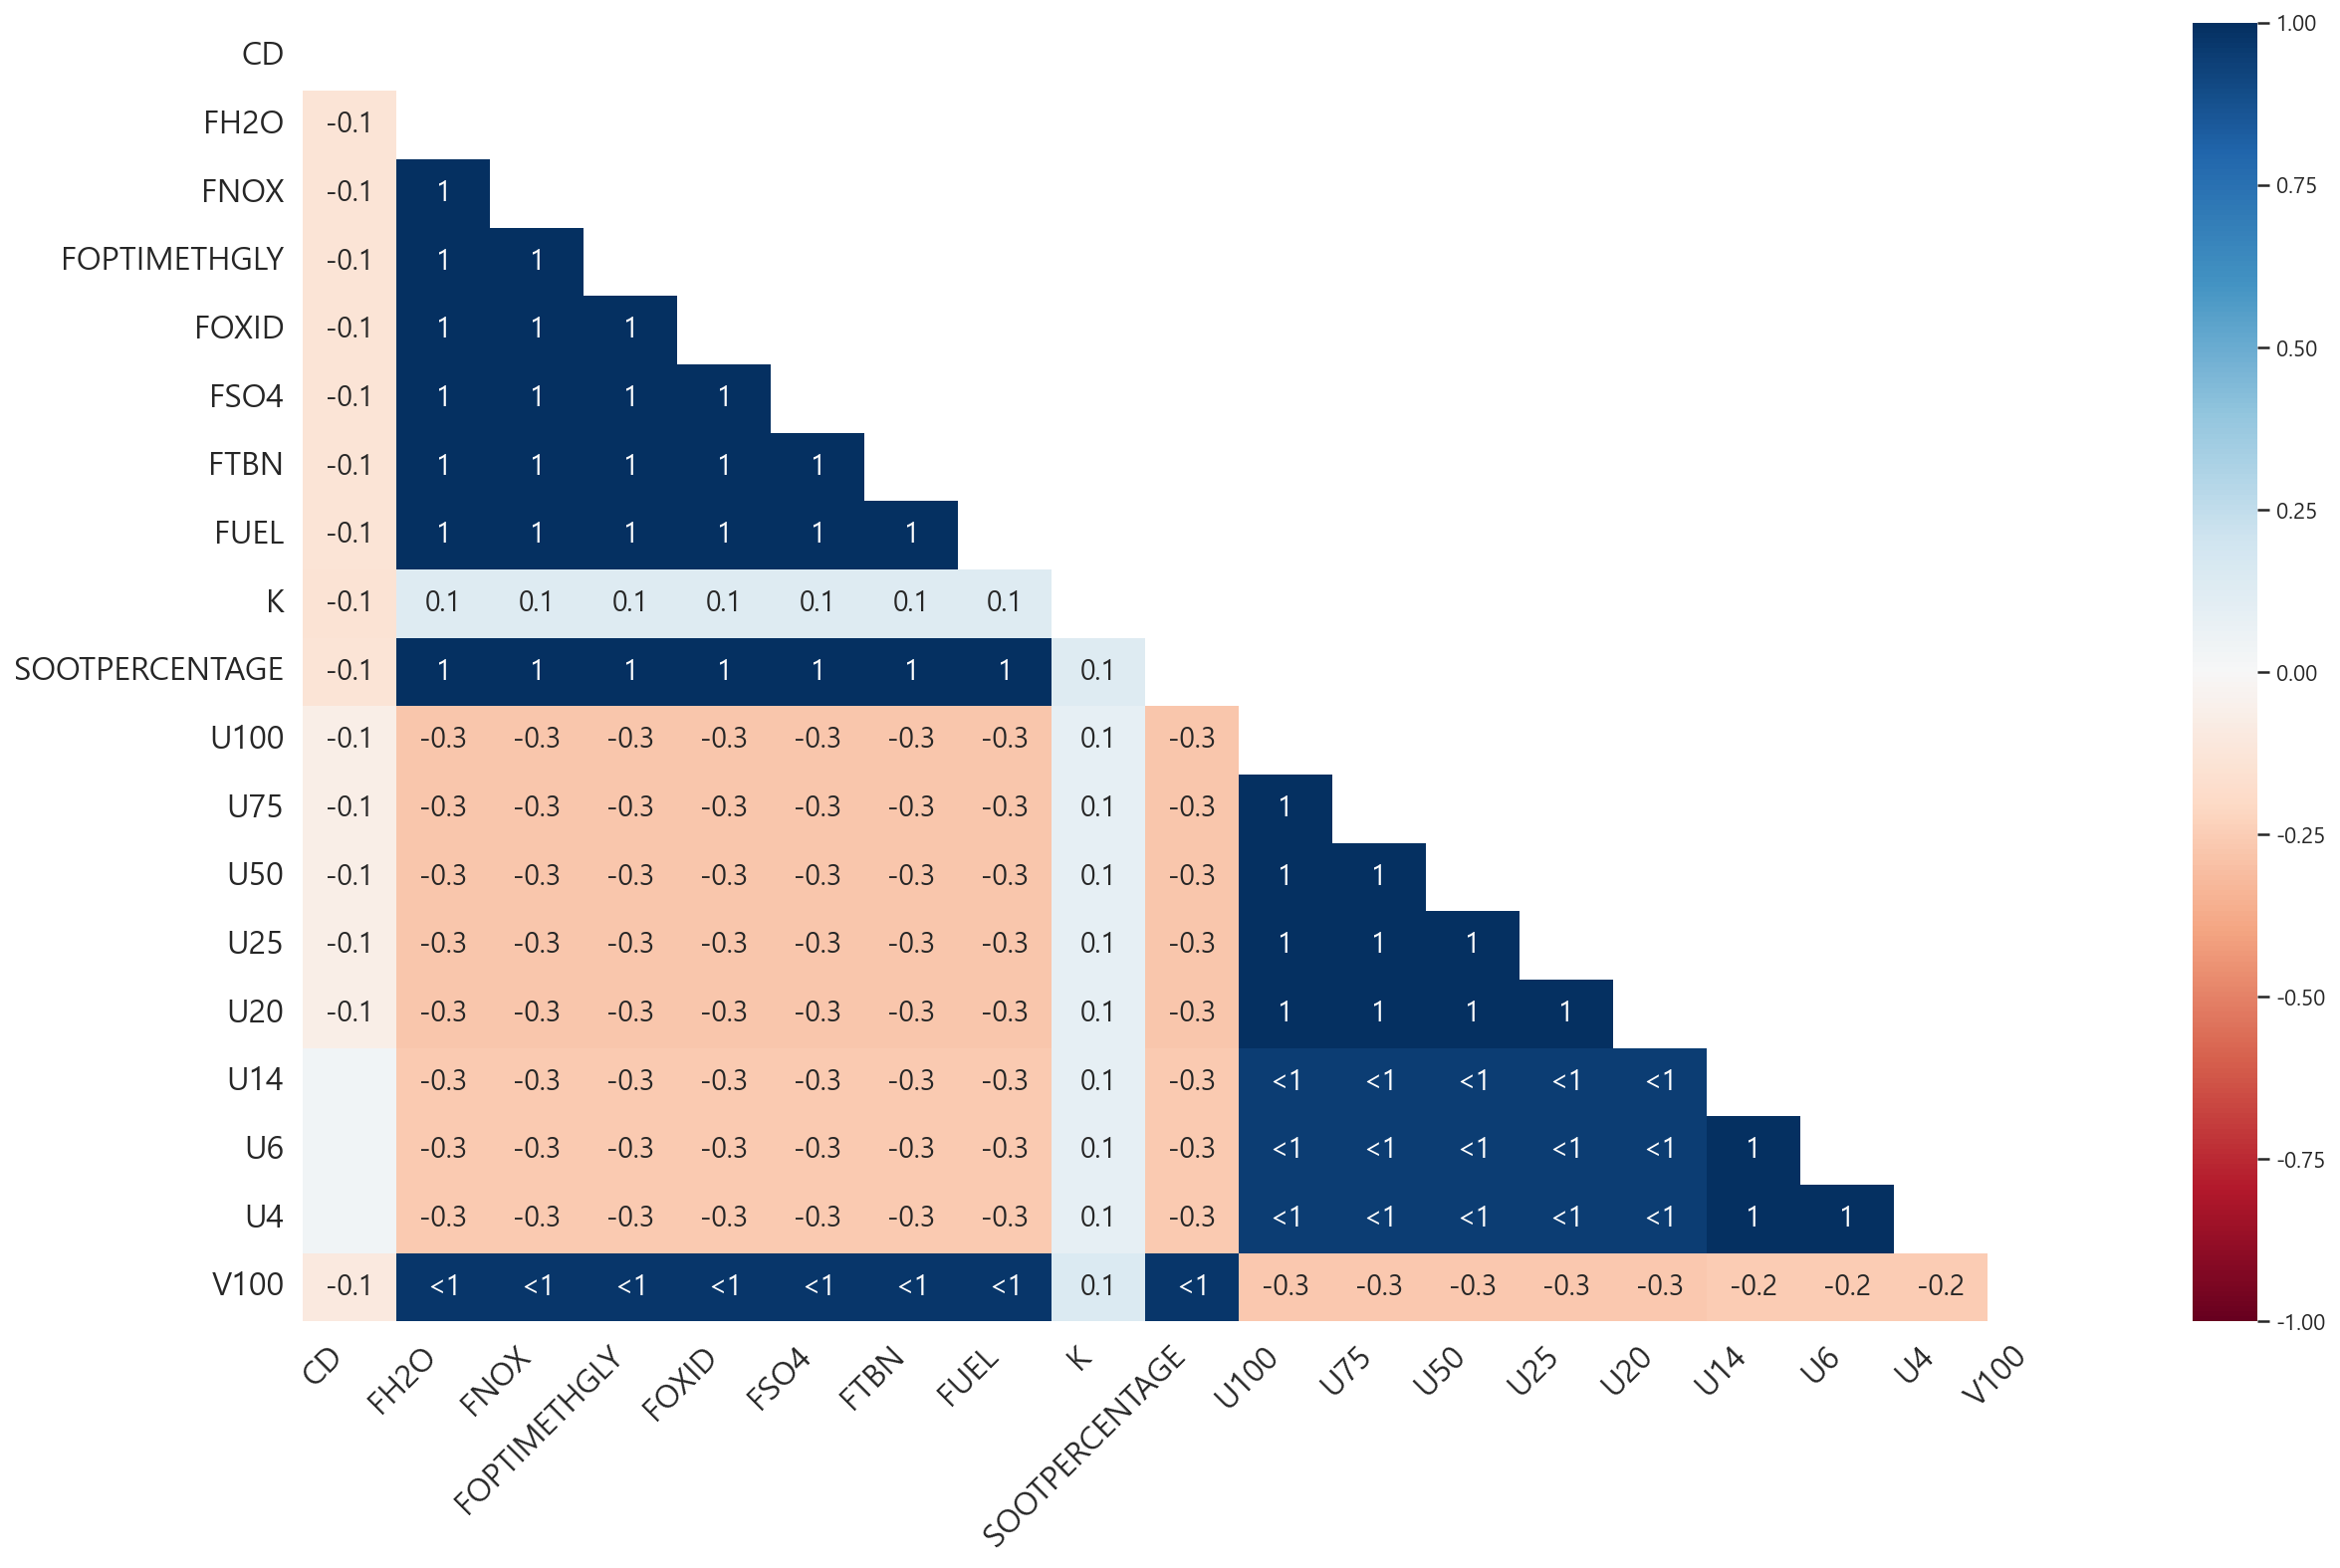

In [11]:
#한 변수의 유무가 다른 변수의 존재에 얼마나 강하게 영향을 미치는지입니다.
# 결측치가 너무 많아서 "1"로 뜬 것 같다. 
msno.heatmap(data)

# heatmap 확인 (변수 제거 전)

In [12]:
# data1= data.copy()
# #data1.info()
# data1 = data1.drop(columns = ['ID','COMPONENT_ARBITRARY'])
# plt.figure(figsize=(30,30))
# sns.heatmap(data1, annot=True, fmt='.1f', cmap='Blues')

# 결측치 처리 

In [13]:

# 'U20', 'U25', 'U50', 'U75', 'U100', 'FOPTIMETHGLY', 'V100' 삭제 
data = data.drop(columns = ['U20', 'U50', 'U100','U75', 'U25', 'FOPTIMETHGLY','V100'])



In [14]:
# Y_LABEL확인
data['Y_LABEL'].value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [15]:
# 결측치 확인 
data.isna().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX                    0
S             

In [16]:

# 결측치 "0"으로 채우기 
feature = ['K', 'CD', 'U4', 'U6', 'U14', 'FH2O', 'FOXID', 'FSO4', 'FNOX', 'FUEL', 'SOOTPERCENTAGE']
for i in feature:
    data[i].fillna(0, inplace=True)   
    
    

In [17]:
data['FUEL'].value_counts()

0.0     13808
1.0       111
1.5        40
2.0        28
2.5        23
4.0        18
3.5        15
3.0        14
4.5         7
12.0        6
6.5         6
5.5         4
8.0         3
5.0         3
7.0         2
6.0         2
11.0        1
8.5         1
0.5         1
9.0         1
11.5        1
Name: FUEL, dtype: int64

In [18]:
# 결측치 확인 --> 결측치 없음. * FTBN은 아직 결측치 존재 . 
data.isna().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                         0
CO                         0
CR                         0
CU                         0
FH2O                       0
FNOX                       0
FOXID                      0
FSO4                       0
FTBN                   10205
FE                         0
FUEL                       0
H2O                        0
K                          0
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX                    0
S             

## FTBN

<AxesSubplot:>

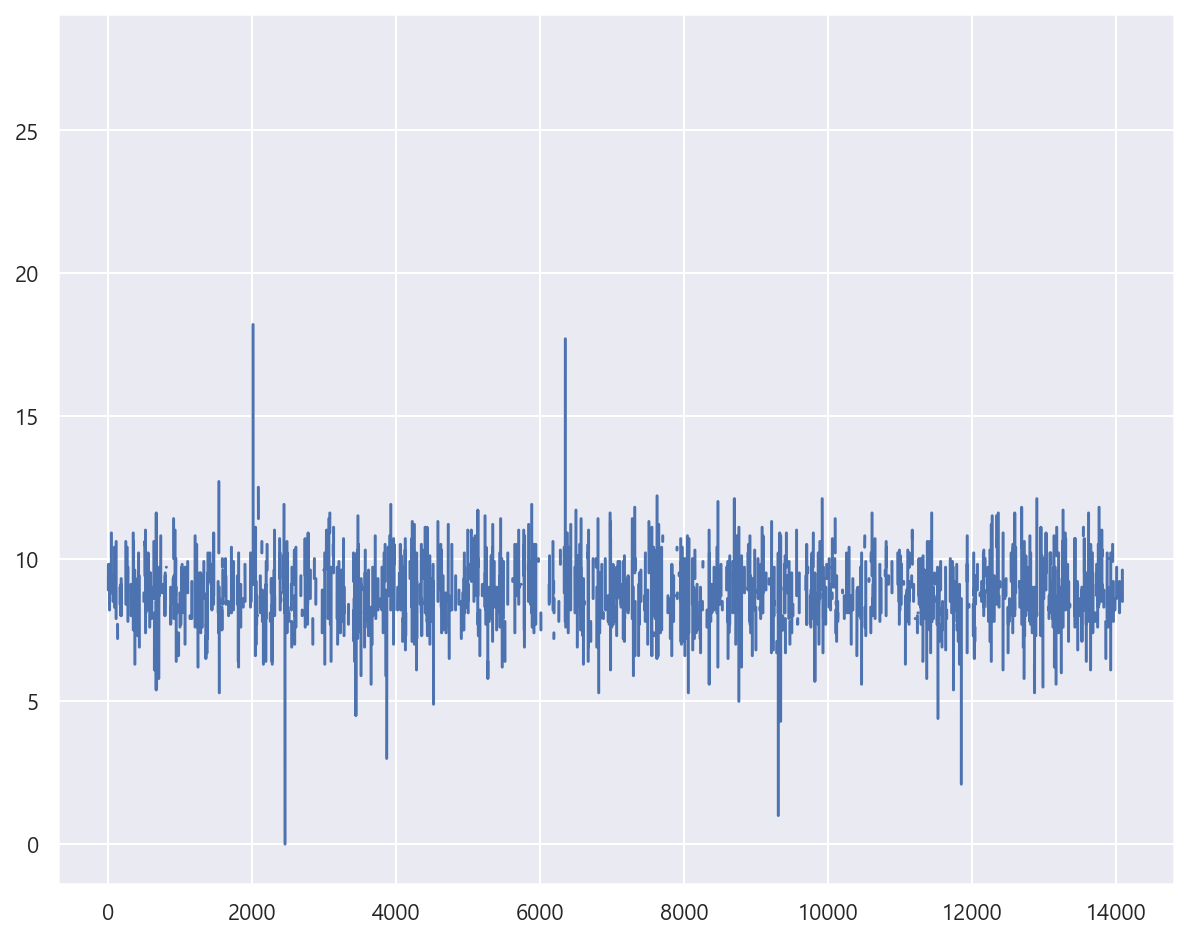

In [19]:
data.FTBN.plot()

In [20]:
data['FTBN'].describe()

count    3890.000000
mean        8.783239
std         1.339355
min         0.000000
25%         8.100000
50%         8.700000
75%         9.600000
max        27.700000
Name: FTBN, dtype: float64

In [21]:
data['FTBN'].value_counts()

8.2     162
8.1     160
8.4     149
8.5     147
8.3     140
       ... 
3.7       1
3.0       1
3.8       1
18.2      1
27.7      1
Name: FTBN, Length: 99, dtype: int64

In [22]:
data.head(3)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,SN,SOOTPERCENTAGE,TI,U14,U6,U4,V,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,2,0.0,5,0.0,0.0,0.0,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,0,0.0,0,6.0,216.0,1454.0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,1,0.0,0,39.0,11261.0,41081.0,0,72.6,412,1


# YEAR, COMPONENT로 groupby 이용해 target값 분석. FUEL

In [23]:
# FTBN의 결측치가 있을 때 Y_LABEL값 확인 
missing_value_mana = ['FTBN']
for i in missing_value_mana:
    print(i, '\n' ,data[data[i].isna()==True]['Y_LABEL'].value_counts(), '\n-----------------------------')

FTBN 
 0    9314
1     891
Name: Y_LABEL, dtype: int64 
-----------------------------


In [24]:
#pd.options.display.max_rows = 785
data.groupby('YEAR')['FTBN'].value_counts()

YEAR  FTBN
2007  8.1     5
      8.7     5
      8.8     5
      9.0     3
      9.2     3
             ..
2022  7.2     1
      7.5     1
      7.6     1
      10.0    1
      10.3    1
Name: FTBN, Length: 785, dtype: int64

In [25]:
data.groupby('YEAR')['Y_LABEL'].value_counts()

YEAR  Y_LABEL
2007  0           292
      1            36
2008  0          1254
      1           165
2009  0           800
      1           149
2010  0           738
      1           128
2011  0          1046
      1           100
2012  0           989
      1            84
2013  0          1100
      1            89
2014  0          1284
      1           116
2015  0          1079
      1            77
2016  0           889
      1            53
2017  0           850
      1            46
2018  0           830
      1            48
2019  0           628
      1            21
2020  0           351
      1            22
2021  0           441
      1            36
2022  0           321
      1            33
Name: Y_LABEL, dtype: int64

In [26]:
data.groupby('YEAR')['FUEL'].value_counts()

YEAR  FUEL
2007  0.0     319
      1.5       3
      2.0       3
      2.5       2
      3.5       1
             ... 
2022  0.0     238
      1.0     111
      2.5       3
      1.5       1
      3.0       1
Name: FUEL, Length: 112, dtype: int64

# IterativeImputer

In [27]:
FTBN = pd.DataFrame(data['FTBN'])
FTBN
# 결측값을 회귀분석을 통한 예측을 하여 채워넣음 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=100)
FTBN_imputed = imputer.fit_transform(FTBN)


# describe()를 하기위해 dataframe으로 바꿔줌 
FTBN_imputed = pd.DataFrame(FTBN_imputed)
FTBN_imputed.describe()

,0
count,14095.000000
mean,8.783239
std,0.703554
min,0.000000
25%,8.783239
50%,8.783239
75%,8.783239
max,27.700000


In [28]:
FTBN_imputed = pd.DataFrame(FTBN_imputed)
FTBN_imputed.describe()
data['FTBN'] = FTBN_imputed

# LABEL encoding

In [29]:


le = LabelEncoder()
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
for col in categorical_features:    
    data[col] = le.fit_transform(data[col])
    


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  int32  
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   14095 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

# 스캐일링

In [31]:
data = data.drop(columns='ID')

In [32]:

# 스케일링
data_need_scale = data.drop(columns = [ 'COMPONENT_ARBITRARY', 'YEAR', 'Y_LABEL'])
ss = StandardScaler()
data_scaled = ss.fit_transform(data_need_scale)
data_scaled = pd.DataFrame(data_scaled, columns = data_need_scale.columns)
data_scaled


data_need_scale.columns

Index(['ANONYMOUS_1', 'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B',
       'BA', 'BE', 'CA', 'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOXID',
       'FSO4', 'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA',
       'NI', 'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE',
       'TI', 'U14', 'U6', 'U4', 'V', 'V40', 'ZN'],
      dtype='object')

In [33]:
label = data[['COMPONENT_ARBITRARY', 'YEAR']]
answer = data['Y_LABEL']
data_scaled

data_new = pd.concat([label, data_scaled], axis=1)

# heatmap (전처리 후)

In [34]:
# plt.figure(figsize=(30,30))
# sns.heatmap(data, annot=True, fmt='.1f', cmap='Blues')

# train_test_split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new, answer, test_size=0.2, random_state= 100)

# XGBoost

In [36]:
!pip install xgboost

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

# 모델 
model = XGBClassifier(n_estimators = 500, max_depth = 4, learning_rate = 0.2, random_state = 100)
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
print('f1 : ', round(f1_score(y_test, pred),2))
print('macro-f1 : ', round(f1_score(y_test, pred, average = 'macro'),2))
print('정확도', round(accuracy_score(y_test, pred),2))
print('정밀도', round(precision_score(y_test, pred),5))
print('재현율', round(recall_score(y_test, pred),5))
print('roc-auc', round(roc_auc_score(y_test, pred),5))
print('오일 모델은 재현율이 더 중요하다')

f1 :  0.68
macro-f1 :  0.83
정확도 0.96
정밀도 0.90909
재현율 0.54299
roc-auc 0.76918
오일 모델은 재현율이 더 중요하다


f1 :  0.68
macro-f1 :  0.83
정확도 0.96
정밀도 0.91
재현율 0.54
오일 모델은 재현율이 더 중요하다

# 임계값 그래프 그리기

In [38]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (10, 7))
    plt.rc('font', family = 'malgun gothic')
    threshold_boundary = thresholds.shape[0]
    a = thresholds[precisions[0:threshold_boundary] == recalls[0:threshold_boundary]]
    loc = np.where(thresholds == a[0])[0][0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    plt.scatter(thresholds[loc], precisions[loc], c = 'black', s = 60)
    plt.text(0.02 + thresholds[loc], precisions[loc], '임계값 : {:.3f}'.format(thresholds[loc]), size = 15)
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2), size = 15)
    plt.xlabel('Threshold value', size = 15); plt.ylabel('Precision and Recall value', size = 15)
    plt.legend()
    plt.rc('legend', fontsize = 15)
    plt.rc('ytick', labelsize = 15)
    plt.show()

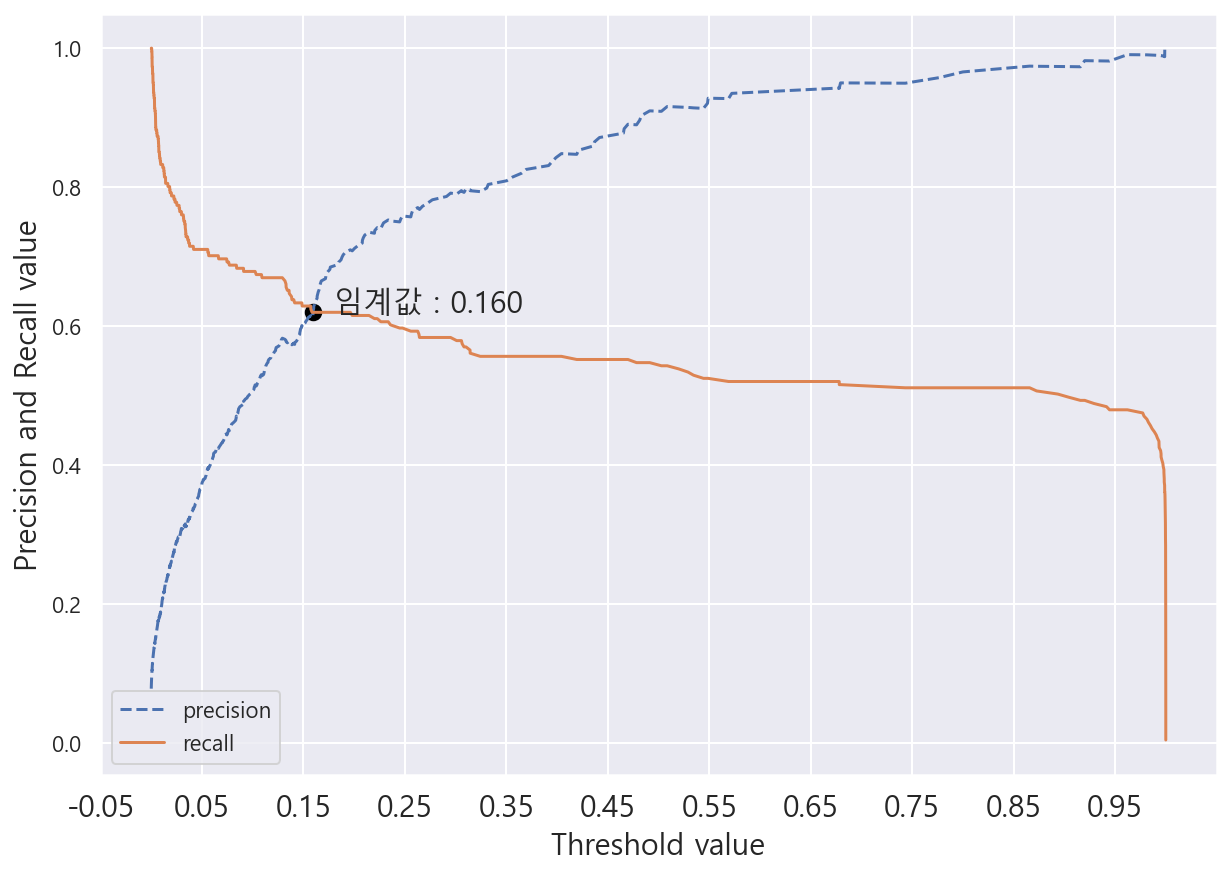

In [39]:
precision_recall_curve_plot(y_test, pred_proba[:,1].reshape(-1,1))

# Feature_importance

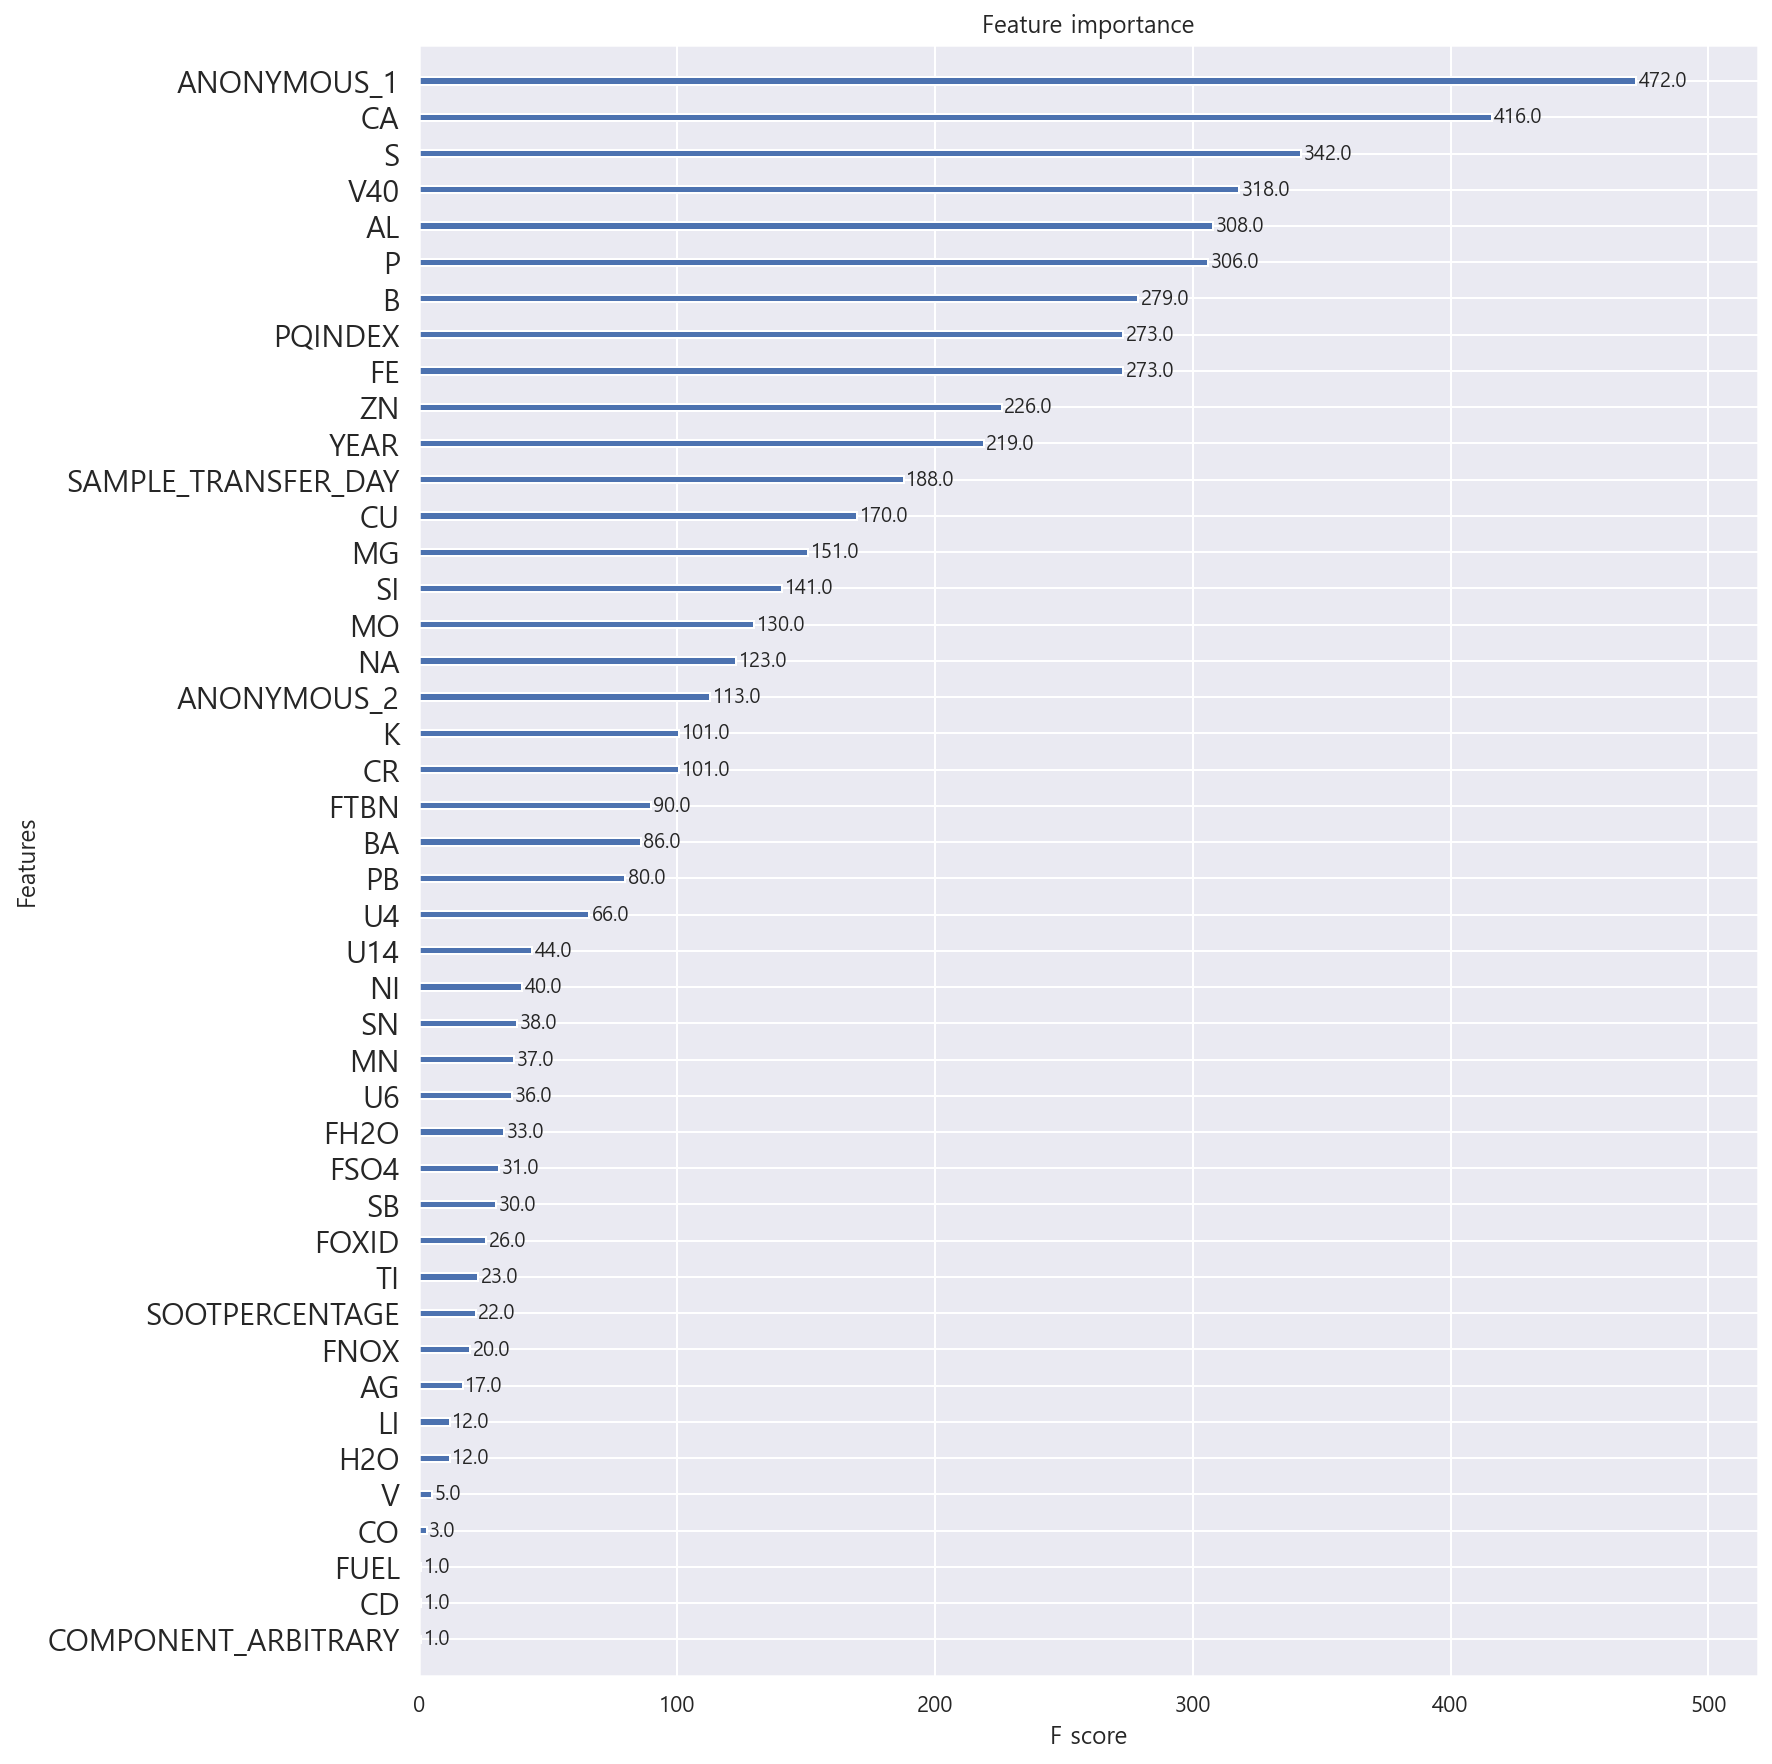

In [40]:
#feature 중요도도 그려볼 수 있다. 
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 15))

# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(model, ax=ax)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize = 30)
plt.show()

# feature_importance확인 후 변수 제거하고 다시 모델 돌리기
--> 별 차이가 없었다. 

In [41]:
# 중요도 낮은 4개의 변수 제거 
data_after_remove = data_new.drop(columns = ['V','CO','FUEL','CD'])

In [42]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_after_remove, answer, test_size=0.2, random_state= 100)

# 모델 
model = XGBClassifier(n_estimators = 500, max_depth = 4, learning_rate = 0.2, random_state = 100)
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
print('f1 : ', round(f1_score(y_test, pred),2))
print('macro-f1 : ', round(f1_score(y_test, pred, average = 'macro'),2))
print('정확도', round(accuracy_score(y_test, pred),2))
print('정밀도', round(precision_score(y_test, pred),2))
print('재현율', round(recall_score(y_test, pred),2))
print('오일 모델은 재현율이 더 중요하다')

f1 :  0.67
macro-f1 :  0.83
정확도 0.96
정밀도 0.89
재현율 0.54
오일 모델은 재현율이 더 중요하다


# LGBM

In [43]:
# 점수 구하기 
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.
          format(accuracy, precision, recall, f1, roc_auc))
    print('Macro f1 socre : ', f1_score(y_test, pred, average='macro'))

# 훈련 시키기 
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [44]:
import lightgbm as ltb
from lightgbm import LGBMClassifier

## 불균형한 데이터 세트에서 boost_from_average = False로 파라미터를 설정
lgbm_clf = LGBMClassifier(n_estimators=1000, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

pred_train = model.predict(X_train)
print('x_train', accuracy_score(y_train, pred_train))
print('x_test',accuracy_score(y_test, pred))

오차 행렬
[[2588   10]
 [ 102  119]]
정확도 : 0.9603, 정밀도 : 0.9225, 재현율 : 0.5385, F1 : 0.6800, AUC : 0.8984
Macro f1 socre :  0.8294099848714069
x_train 0.9996452642781128
x_test 0.9588506562610855


오차 행렬
<br>
[[2588   10]
<br>
 [ 100  121]]
 <br>
정확도 : 0.9610, 정밀도 : 0.9237, 재현율 : 0.5475, F1 : 0.6875, AUC : 0.8966
Macro f1 socre :  0.8333451570185395

# voting(SVC,knn,dt & S-Kfold)

In [45]:
!pip install threadpoolctl==3.1.0

In [46]:
# 보팅 분류기 Voting
# 3개 
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC(C= 0.1, gamma='auto', probability=True) # C값을 바꿔주면서 테스트해야할듯 
dt = DecisionTreeClassifier(max_depth=3)

estimators = [('knn', knn), ('dt', dt), ('svc', svc)]  # 모델 집합 

voting_model = VotingClassifier(estimators, voting = 'soft')

voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
#pred_test = voting_model.predict(test_new) # 우리가 제출할 값 


models = [knn, dt, svc]

# train 데이터만 활용했을 때 f1 스코어 
for model in models :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    model_name = model.__class__.__name__
    print('%s 정확도 : %.3f' %(model_name, accuracy_score(pred, y_test)))
    print('Macro f1 socre : ', f1_score(y_test, pred, average='macro'))

KNeighborsClassifier 정확도 : 0.929
Macro f1 socre :  0.6732298623266706
DecisionTreeClassifier 정확도 : 0.960
Macro f1 socre :  0.8226709442033087
SVC 정확도 : 0.933
Macro f1 socre :  0.6124621216552982


In [47]:
from sklearn.model_selection import StratifiedKFold

X = np.array(data_new)
y = answer
n_iter=0
cv_accuarcy=[]

skf = StratifiedKFold(n_splits=5, shuffle=False)


for train_index, test_index in skf.split(X, answer):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    voting_model.fit(X_train, y_train)
    pred = voting_model.predict(X_test)
    #pred_test = voting_model.predict(test_new)
    
    # 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print('\n{} 교차검증  : {} , 학습 데이터 : {} , 검증 데이터 : {}'.format(n_iter, accuracy, X_train.shape[0],
                                                                X_test.shape[0]))
    print('Macro f1 score : ', f1_score(y_test, pred, labels=[0,1], average='macro'))

    cv_accuarcy.append(accuracy)
print('\n')

print('\n 평균 정확도 :  ', np.mean(cv_accuarcy))  # 평균정확도


1 교차검증  : 0.9514 , 학습 데이터 : 11276 , 검증 데이터 : 2819
Macro f1 score :  0.7885076543534392

2 교차검증  : 0.9553 , 학습 데이터 : 11276 , 검증 데이터 : 2819
Macro f1 score :  0.8130636604774536

3 교차검증  : 0.9493 , 학습 데이터 : 11276 , 검증 데이터 : 2819
Macro f1 score :  0.7872914227340052

4 교차검증  : 0.9525 , 학습 데이터 : 11276 , 검증 데이터 : 2819
Macro f1 score :  0.798054675237472

5 교차검증  : 0.9493 , 학습 데이터 : 11276 , 검증 데이터 : 2819
Macro f1 score :  0.7780418844996517



 평균 정확도 :   0.95156


# Hyperopt - DL

In [66]:
from lightgbm import LGBMClassifier
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로 , min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 갑승로 검색
lgbm_search_space = {'num_leaves' : hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth' : hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples' : hp.quniform('min_child_samples', 60, 100, 1),
                    'subsample' : hp.uniform('subsample', 0.7, 1),
                    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
                   }

In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# fmim()에서 호출 시 search_space 값으로 NGBClassifier 교차 검증 학습 후 -1 * roc_auc 평균 값을 반환.
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators = 500,
                            num_leaves = int(search_space['num_leaves']),
                            max_depth = int(search_space['max_depth']),
                            min_child_samples = int(search_space['min_child_samples']),
                            subsample = search_space['subsample'],
                            learning_rate = search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    skf = StratifiedKFold(n_splits=7)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in skf.split(X_train, y_train):
        #kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 LGBMClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'logloss',
                    eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측환 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값을 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되, 
    # hyperOpt는 목적함수의 최솟값을 위한 입력값을 반환하므로 -1을 곱한 뒤 반환.
    return -1 * np.mean(roc_auc_list)

In [68]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn = objective_func,
           space = lgbm_search_space,
           algo = tpe.suggest,
           max_evals = 500,
            trials = trials, rstate = np.random.default_rng(seed = 30)
           )

print('best :', best)

[1]	training's binary_logloss: 0.279611	valid_1's binary_logloss: 0.281474                                             
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's binary_logloss: 0.270092	valid_1's binary_logloss: 0.273921                                             
[3]	training's binary_logloss: 0.262079	valid_1's binary_logloss: 0.267602                                             
[4]	training's binary_logloss: 0.255212	valid_1's binary_logloss: 0.262087                                             
[5]	training's binary_logloss: 0.249089	valid_1's binary_logloss: 0.25704                                              
[6]	training's binary_logloss: 0.243594	valid_1's binary_logloss: 0.252533                                             
[7]	training's binary_logloss: 0.238566	valid_1's binary_logloss: 0.248496                                             
[8]	training's binary_logloss: 0.233973	

[68]	training's binary_logloss: 0.136298	valid_1's binary_logloss: 0.174183                                            
[69]	training's binary_logloss: 0.135522	valid_1's binary_logloss: 0.173714                                            
[70]	training's binary_logloss: 0.134804	valid_1's binary_logloss: 0.17341                                             
[71]	training's binary_logloss: 0.134072	valid_1's binary_logloss: 0.172992                                            
[72]	training's binary_logloss: 0.133394	valid_1's binary_logloss: 0.172774                                            
[73]	training's binary_logloss: 0.132663	valid_1's binary_logloss: 0.172534                                            
[74]	training's binary_logloss: 0.131952	valid_1's binary_logloss: 0.172373                                            
[75]	training's binary_logloss: 0.131191	valid_1's binary_logloss: 0.171989                                            
[76]	training's binary_logloss: 0.130468

[136]	training's binary_logloss: 0.0998023	valid_1's binary_logloss: 0.162455                                          
[137]	training's binary_logloss: 0.0994081	valid_1's binary_logloss: 0.162449                                          
[138]	training's binary_logloss: 0.0990048	valid_1's binary_logloss: 0.162375                                          
[139]	training's binary_logloss: 0.0986574	valid_1's binary_logloss: 0.16238                                           
[140]	training's binary_logloss: 0.0982663	valid_1's binary_logloss: 0.1623                                            
[141]	training's binary_logloss: 0.0978784	valid_1's binary_logloss: 0.162257                                          
[142]	training's binary_logloss: 0.0974878	valid_1's binary_logloss: 0.162228                                          
[143]	training's binary_logloss: 0.0971405	valid_1's binary_logloss: 0.162121                                          
[144]	training's binary_logloss: 0.09677

[204]	training's binary_logloss: 0.0788559	valid_1's binary_logloss: 0.161364                                          
[205]	training's binary_logloss: 0.0785963	valid_1's binary_logloss: 0.16155                                           
[206]	training's binary_logloss: 0.0783429	valid_1's binary_logloss: 0.161513                                          
[207]	training's binary_logloss: 0.0781232	valid_1's binary_logloss: 0.161565                                          
[208]	training's binary_logloss: 0.0778974	valid_1's binary_logloss: 0.16158                                           
[209]	training's binary_logloss: 0.0776736	valid_1's binary_logloss: 0.161636                                          
[210]	training's binary_logloss: 0.0773896	valid_1's binary_logloss: 0.161644                                          
[211]	training's binary_logloss: 0.077122	valid_1's binary_logloss: 0.161612                                           
[212]	training's binary_logloss: 0.07690

[45]	training's binary_logloss: 0.158166	valid_1's binary_logloss: 0.167352                                            
[46]	training's binary_logloss: 0.157071	valid_1's binary_logloss: 0.166698                                            
[47]	training's binary_logloss: 0.156068	valid_1's binary_logloss: 0.166025                                            
[48]	training's binary_logloss: 0.155092	valid_1's binary_logloss: 0.165268                                            
[49]	training's binary_logloss: 0.154085	valid_1's binary_logloss: 0.164738                                            
[50]	training's binary_logloss: 0.152983	valid_1's binary_logloss: 0.164109                                            
[51]	training's binary_logloss: 0.151911	valid_1's binary_logloss: 0.163503                                            
[52]	training's binary_logloss: 0.150871	valid_1's binary_logloss: 0.16294                                             
[53]	training's binary_logloss: 0.149968

[113]	training's binary_logloss: 0.111808	valid_1's binary_logloss: 0.144087                                           
[114]	training's binary_logloss: 0.111349	valid_1's binary_logloss: 0.144024                                           
[115]	training's binary_logloss: 0.110869	valid_1's binary_logloss: 0.143947                                           
[116]	training's binary_logloss: 0.110433	valid_1's binary_logloss: 0.143821                                           
[117]	training's binary_logloss: 0.109985	valid_1's binary_logloss: 0.143681                                           
[118]	training's binary_logloss: 0.109534	valid_1's binary_logloss: 0.143564                                           
[119]	training's binary_logloss: 0.109166	valid_1's binary_logloss: 0.143441                                           
[120]	training's binary_logloss: 0.108708	valid_1's binary_logloss: 0.14338                                            
[121]	training's binary_logloss: 0.10827

[181]	training's binary_logloss: 0.0871291	valid_1's binary_logloss: 0.141784                                          
[182]	training's binary_logloss: 0.0868796	valid_1's binary_logloss: 0.141813                                          
[183]	training's binary_logloss: 0.0865865	valid_1's binary_logloss: 0.14175                                           
[184]	training's binary_logloss: 0.0863098	valid_1's binary_logloss: 0.14178                                           
[185]	training's binary_logloss: 0.0860601	valid_1's binary_logloss: 0.141708                                          
[186]	training's binary_logloss: 0.0857695	valid_1's binary_logloss: 0.141761                                          
[187]	training's binary_logloss: 0.085489	valid_1's binary_logloss: 0.141668                                           
[188]	training's binary_logloss: 0.0852024	valid_1's binary_logloss: 0.141659                                          
[189]	training's binary_logloss: 0.08494

[25]	training's binary_logloss: 0.186769	valid_1's binary_logloss: 0.196101                                            
[26]	training's binary_logloss: 0.184867	valid_1's binary_logloss: 0.194656                                            
[27]	training's binary_logloss: 0.183027	valid_1's binary_logloss: 0.19321                                             
[28]	training's binary_logloss: 0.181276	valid_1's binary_logloss: 0.191885                                            
[29]	training's binary_logloss: 0.179522	valid_1's binary_logloss: 0.190639                                            
[30]	training's binary_logloss: 0.17782	valid_1's binary_logloss: 0.189349                                             
[31]	training's binary_logloss: 0.176188	valid_1's binary_logloss: 0.188082                                            
[32]	training's binary_logloss: 0.174566	valid_1's binary_logloss: 0.186887                                            
[33]	training's binary_logloss: 0.173044

[93]	training's binary_logloss: 0.120776	valid_1's binary_logloss: 0.155117                                            
[94]	training's binary_logloss: 0.120231	valid_1's binary_logloss: 0.155019                                            
[95]	training's binary_logloss: 0.119699	valid_1's binary_logloss: 0.154958                                            
[96]	training's binary_logloss: 0.119102	valid_1's binary_logloss: 0.154692                                            
[97]	training's binary_logloss: 0.118537	valid_1's binary_logloss: 0.154485                                            
[98]	training's binary_logloss: 0.117994	valid_1's binary_logloss: 0.154294                                            
[99]	training's binary_logloss: 0.117453	valid_1's binary_logloss: 0.154146                                            
[100]	training's binary_logloss: 0.116939	valid_1's binary_logloss: 0.153937                                           
[101]	training's binary_logloss: 0.11643

[161]	training's binary_logloss: 0.0923758	valid_1's binary_logloss: 0.15237                                           
[162]	training's binary_logloss: 0.0920383	valid_1's binary_logloss: 0.152475                                          
[163]	training's binary_logloss: 0.0916994	valid_1's binary_logloss: 0.152534                                          
[164]	training's binary_logloss: 0.0913552	valid_1's binary_logloss: 0.152462                                          
[165]	training's binary_logloss: 0.0910156	valid_1's binary_logloss: 0.152541                                          
[166]	training's binary_logloss: 0.0906941	valid_1's binary_logloss: 0.152551                                          
Early stopping, best iteration is:                                                                                     
[136]	training's binary_logloss: 0.101044	valid_1's binary_logloss: 0.151455
[1]	training's binary_logloss: 0.279509	valid_1's binary_logloss: 0.281571         

[60]	training's binary_logloss: 0.144388	valid_1's binary_logloss: 0.164575                                            
[61]	training's binary_logloss: 0.143556	valid_1's binary_logloss: 0.16406                                             
[62]	training's binary_logloss: 0.142768	valid_1's binary_logloss: 0.163505                                            
[63]	training's binary_logloss: 0.141863	valid_1's binary_logloss: 0.163029                                            
[64]	training's binary_logloss: 0.140939	valid_1's binary_logloss: 0.162565                                            
[65]	training's binary_logloss: 0.140069	valid_1's binary_logloss: 0.162091                                            
[66]	training's binary_logloss: 0.13929	valid_1's binary_logloss: 0.161678                                             
[67]	training's binary_logloss: 0.138531	valid_1's binary_logloss: 0.161322                                            
[68]	training's binary_logloss: 0.137819

[128]	training's binary_logloss: 0.104391	valid_1's binary_logloss: 0.148057                                           
[129]	training's binary_logloss: 0.104045	valid_1's binary_logloss: 0.148106                                           
[130]	training's binary_logloss: 0.10357	valid_1's binary_logloss: 0.148082                                            
[131]	training's binary_logloss: 0.103214	valid_1's binary_logloss: 0.14804                                            
[132]	training's binary_logloss: 0.102784	valid_1's binary_logloss: 0.147963                                           
[133]	training's binary_logloss: 0.102412	valid_1's binary_logloss: 0.147871                                           
[134]	training's binary_logloss: 0.101972	valid_1's binary_logloss: 0.147828                                           
[135]	training's binary_logloss: 0.101606	valid_1's binary_logloss: 0.147757                                           
[136]	training's binary_logloss: 0.10122

[196]	training's binary_logloss: 0.0820857	valid_1's binary_logloss: 0.146206                                          
[197]	training's binary_logloss: 0.0818325	valid_1's binary_logloss: 0.146362                                          
[198]	training's binary_logloss: 0.0815908	valid_1's binary_logloss: 0.146366                                          
[199]	training's binary_logloss: 0.0813348	valid_1's binary_logloss: 0.14643                                           
[200]	training's binary_logloss: 0.0810744	valid_1's binary_logloss: 0.146419                                          
[201]	training's binary_logloss: 0.080833	valid_1's binary_logloss: 0.146348                                           
[202]	training's binary_logloss: 0.0806087	valid_1's binary_logloss: 0.146247                                          
[203]	training's binary_logloss: 0.0803699	valid_1's binary_logloss: 0.146197                                          
[204]	training's binary_logloss: 0.08013

[4]	training's binary_logloss: 0.254943	valid_1's binary_logloss: 0.258471                                             
[5]	training's binary_logloss: 0.248709	valid_1's binary_logloss: 0.252936                                             
[6]	training's binary_logloss: 0.243144	valid_1's binary_logloss: 0.248091                                             
[7]	training's binary_logloss: 0.238071	valid_1's binary_logloss: 0.243588                                             
[8]	training's binary_logloss: 0.233336	valid_1's binary_logloss: 0.239443                                             
[9]	training's binary_logloss: 0.229006	valid_1's binary_logloss: 0.235774                                             
[10]	training's binary_logloss: 0.224969	valid_1's binary_logloss: 0.232423                                            
[11]	training's binary_logloss: 0.22122	valid_1's binary_logloss: 0.229353                                             
[12]	training's binary_logloss: 0.217726

[72]	training's binary_logloss: 0.132814	valid_1's binary_logloss: 0.171372                                            
[73]	training's binary_logloss: 0.132084	valid_1's binary_logloss: 0.171027                                            
[74]	training's binary_logloss: 0.131398	valid_1's binary_logloss: 0.170869                                            
[75]	training's binary_logloss: 0.130636	valid_1's binary_logloss: 0.170531                                            
[76]	training's binary_logloss: 0.129929	valid_1's binary_logloss: 0.17041                                             
[77]	training's binary_logloss: 0.129243	valid_1's binary_logloss: 0.170202                                            
[78]	training's binary_logloss: 0.128583	valid_1's binary_logloss: 0.17004                                             
[79]	training's binary_logloss: 0.127941	valid_1's binary_logloss: 0.169957                                            
[80]	training's binary_logloss: 0.127321

[140]	training's binary_logloss: 0.0976709	valid_1's binary_logloss: 0.164467                                          
[141]	training's binary_logloss: 0.0972559	valid_1's binary_logloss: 0.164464                                          
[142]	training's binary_logloss: 0.0968793	valid_1's binary_logloss: 0.164596                                          
[143]	training's binary_logloss: 0.0964913	valid_1's binary_logloss: 0.164622                                          
[144]	training's binary_logloss: 0.096152	valid_1's binary_logloss: 0.164557                                           
[145]	training's binary_logloss: 0.095775	valid_1's binary_logloss: 0.164575                                           
[146]	training's binary_logloss: 0.095385	valid_1's binary_logloss: 0.164598                                           
[147]	training's binary_logloss: 0.0949962	valid_1's binary_logloss: 0.164602                                          
[148]	training's binary_logloss: 0.09464

[34]	training's binary_logloss: 0.17369	valid_1's binary_logloss: 0.176678                                             
[35]	training's binary_logloss: 0.172245	valid_1's binary_logloss: 0.175388                                            
[36]	training's binary_logloss: 0.170829	valid_1's binary_logloss: 0.174185                                            
[37]	training's binary_logloss: 0.169518	valid_1's binary_logloss: 0.17299                                             
[38]	training's binary_logloss: 0.168203	valid_1's binary_logloss: 0.17189                                             
[39]	training's binary_logloss: 0.166936	valid_1's binary_logloss: 0.170824                                            
[40]	training's binary_logloss: 0.165733	valid_1's binary_logloss: 0.16976                                             
[41]	training's binary_logloss: 0.164586	valid_1's binary_logloss: 0.16881                                             
[42]	training's binary_logloss: 0.163432

[102]	training's binary_logloss: 0.117258	valid_1's binary_logloss: 0.13962                                            
[103]	training's binary_logloss: 0.116748	valid_1's binary_logloss: 0.139302                                           
[104]	training's binary_logloss: 0.116241	valid_1's binary_logloss: 0.139031                                           
[105]	training's binary_logloss: 0.115748	valid_1's binary_logloss: 0.138896                                           
[106]	training's binary_logloss: 0.115287	valid_1's binary_logloss: 0.138773                                           
[107]	training's binary_logloss: 0.114809	valid_1's binary_logloss: 0.138632                                           
[108]	training's binary_logloss: 0.114354	valid_1's binary_logloss: 0.138433                                           
[109]	training's binary_logloss: 0.113856	valid_1's binary_logloss: 0.138323                                           
[110]	training's binary_logloss: 0.11336

[170]	training's binary_logloss: 0.0908436	valid_1's binary_logloss: 0.13383                                           
[171]	training's binary_logloss: 0.0905729	valid_1's binary_logloss: 0.133822                                          
[172]	training's binary_logloss: 0.0903241	valid_1's binary_logloss: 0.133811                                          
[173]	training's binary_logloss: 0.0900065	valid_1's binary_logloss: 0.133861                                          
[174]	training's binary_logloss: 0.089682	valid_1's binary_logloss: 0.133783                                           
[175]	training's binary_logloss: 0.0893877	valid_1's binary_logloss: 0.133832                                          
[176]	training's binary_logloss: 0.0890928	valid_1's binary_logloss: 0.133856                                          
[177]	training's binary_logloss: 0.0888207	valid_1's binary_logloss: 0.133873                                          
[178]	training's binary_logloss: 0.08851

[238]	training's binary_logloss: 0.0737656	valid_1's binary_logloss: 0.133546                                          
[239]	training's binary_logloss: 0.0735482	valid_1's binary_logloss: 0.133546                                          
[240]	training's binary_logloss: 0.0733272	valid_1's binary_logloss: 0.133528                                          
[241]	training's binary_logloss: 0.0731331	valid_1's binary_logloss: 0.133513                                          
[242]	training's binary_logloss: 0.0729272	valid_1's binary_logloss: 0.133547                                          
[243]	training's binary_logloss: 0.0727228	valid_1's binary_logloss: 0.133579                                          
[244]	training's binary_logloss: 0.0724633	valid_1's binary_logloss: 0.133522                                          
[245]	training's binary_logloss: 0.0722943	valid_1's binary_logloss: 0.133553                                          
[246]	training's binary_logloss: 0.07208

[42]	training's binary_logloss: 0.16312	valid_1's binary_logloss: 0.170005                                             
[43]	training's binary_logloss: 0.161861	valid_1's binary_logloss: 0.169107                                            
[44]	training's binary_logloss: 0.160732	valid_1's binary_logloss: 0.168247                                            
[45]	training's binary_logloss: 0.159699	valid_1's binary_logloss: 0.167509                                            
[46]	training's binary_logloss: 0.158538	valid_1's binary_logloss: 0.166722                                            
[47]	training's binary_logloss: 0.157535	valid_1's binary_logloss: 0.165974                                            
[48]	training's binary_logloss: 0.156514	valid_1's binary_logloss: 0.165262                                            
[49]	training's binary_logloss: 0.155484	valid_1's binary_logloss: 0.164602                                            
[50]	training's binary_logloss: 0.154571

[110]	training's binary_logloss: 0.114121	valid_1's binary_logloss: 0.140403                                           
[111]	training's binary_logloss: 0.113687	valid_1's binary_logloss: 0.140219                                           
[112]	training's binary_logloss: 0.113228	valid_1's binary_logloss: 0.140135                                           
[113]	training's binary_logloss: 0.112759	valid_1's binary_logloss: 0.140021                                           
[114]	training's binary_logloss: 0.112231	valid_1's binary_logloss: 0.139886                                           
[115]	training's binary_logloss: 0.111801	valid_1's binary_logloss: 0.13973                                            
[116]	training's binary_logloss: 0.111382	valid_1's binary_logloss: 0.139536                                           
[117]	training's binary_logloss: 0.110962	valid_1's binary_logloss: 0.139285                                           
[118]	training's binary_logloss: 0.11048

[178]	training's binary_logloss: 0.0889201	valid_1's binary_logloss: 0.136073                                          
[179]	training's binary_logloss: 0.0886072	valid_1's binary_logloss: 0.136038                                          
[180]	training's binary_logloss: 0.0882953	valid_1's binary_logloss: 0.136061                                          
[181]	training's binary_logloss: 0.0880409	valid_1's binary_logloss: 0.136014                                          
[182]	training's binary_logloss: 0.0877259	valid_1's binary_logloss: 0.136072                                          
[183]	training's binary_logloss: 0.0874252	valid_1's binary_logloss: 0.135992                                          
[184]	training's binary_logloss: 0.0870943	valid_1's binary_logloss: 0.135887                                          
[185]	training's binary_logloss: 0.0868035	valid_1's binary_logloss: 0.135892                                          
[186]	training's binary_logloss: 0.08650

[24]	training's binary_logloss: 0.0875681	valid_1's binary_logloss: 0.164266                                           
[25]	training's binary_logloss: 0.0849652	valid_1's binary_logloss: 0.164273                                           
[26]	training's binary_logloss: 0.0823828	valid_1's binary_logloss: 0.164366                                           
[27]	training's binary_logloss: 0.0801123	valid_1's binary_logloss: 0.165022                                           
[28]	training's binary_logloss: 0.07784	valid_1's binary_logloss: 0.164882                                             
[29]	training's binary_logloss: 0.0755834	valid_1's binary_logloss: 0.165424                                           
[30]	training's binary_logloss: 0.0732359	valid_1's binary_logloss: 0.165491                                           
[31]	training's binary_logloss: 0.071071	valid_1's binary_logloss: 0.165911                                            
[32]	training's binary_logloss: 0.069048

[35]	training's binary_logloss: 0.0657176	valid_1's binary_logloss: 0.143478                                           
[36]	training's binary_logloss: 0.0639063	valid_1's binary_logloss: 0.142998                                           
[37]	training's binary_logloss: 0.0624433	valid_1's binary_logloss: 0.143457                                           
[38]	training's binary_logloss: 0.0609119	valid_1's binary_logloss: 0.143097                                           
[39]	training's binary_logloss: 0.059406	valid_1's binary_logloss: 0.142673                                            
[40]	training's binary_logloss: 0.0578548	valid_1's binary_logloss: 0.143079                                           
[41]	training's binary_logloss: 0.0563831	valid_1's binary_logloss: 0.143377                                           
[42]	training's binary_logloss: 0.0547383	valid_1's binary_logloss: 0.144171                                           
[43]	training's binary_logloss: 0.053460

[41]	training's binary_logloss: 0.0554298	valid_1's binary_logloss: 0.153736                                           
[42]	training's binary_logloss: 0.0539889	valid_1's binary_logloss: 0.154272                                           
[43]	training's binary_logloss: 0.0524871	valid_1's binary_logloss: 0.155102                                           
[44]	training's binary_logloss: 0.0508931	valid_1's binary_logloss: 0.155648                                           
[45]	training's binary_logloss: 0.0496417	valid_1's binary_logloss: 0.156683                                           
[46]	training's binary_logloss: 0.0484755	valid_1's binary_logloss: 0.156091                                           
[47]	training's binary_logloss: 0.0472841	valid_1's binary_logloss: 0.156252                                           
[48]	training's binary_logloss: 0.0460632	valid_1's binary_logloss: 0.156663                                           
[49]	training's binary_logloss: 0.045077

[47]	training's binary_logloss: 0.0475566	valid_1's binary_logloss: 0.149544                                           
[48]	training's binary_logloss: 0.046302	valid_1's binary_logloss: 0.149035                                            
[49]	training's binary_logloss: 0.045197	valid_1's binary_logloss: 0.149577                                            
[50]	training's binary_logloss: 0.044031	valid_1's binary_logloss: 0.150371                                            
[51]	training's binary_logloss: 0.0429467	valid_1's binary_logloss: 0.151033                                           
[52]	training's binary_logloss: 0.042074	valid_1's binary_logloss: 0.151091                                            
[53]	training's binary_logloss: 0.0410205	valid_1's binary_logloss: 0.150951                                           
[54]	training's binary_logloss: 0.0400147	valid_1's binary_logloss: 0.151903                                           
[55]	training's binary_logloss: 0.039054

[1]	training's binary_logloss: 0.231325	valid_1's binary_logloss: 0.231176                                             
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's binary_logloss: 0.21146	valid_1's binary_logloss: 0.211344                                              
[3]	training's binary_logloss: 0.196924	valid_1's binary_logloss: 0.198377                                             
[4]	training's binary_logloss: 0.185028	valid_1's binary_logloss: 0.18777                                              
[5]	training's binary_logloss: 0.174867	valid_1's binary_logloss: 0.179672                                             
[6]	training's binary_logloss: 0.166427	valid_1's binary_logloss: 0.172557                                             
[7]	training's binary_logloss: 0.159183	valid_1's binary_logloss: 0.166252                                             
[8]	training's binary_logloss: 0.15251	v

[1]	training's binary_logloss: 0.232121	valid_1's binary_logloss: 0.232662                                             
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's binary_logloss: 0.212004	valid_1's binary_logloss: 0.213548                                             
[3]	training's binary_logloss: 0.197081	valid_1's binary_logloss: 0.19931                                              
[4]	training's binary_logloss: 0.184916	valid_1's binary_logloss: 0.188709                                             
[5]	training's binary_logloss: 0.175355	valid_1's binary_logloss: 0.180343                                             
[6]	training's binary_logloss: 0.166934	valid_1's binary_logloss: 0.17334                                              
[7]	training's binary_logloss: 0.159726	valid_1's binary_logloss: 0.168438                                             
[8]	training's binary_logloss: 0.153421	

[1]	training's binary_logloss: 0.260674	valid_1's binary_logloss: 0.266796                                             
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's binary_logloss: 0.243293	valid_1's binary_logloss: 0.252885                                             
[3]	training's binary_logloss: 0.23035	valid_1's binary_logloss: 0.242283                                              
[4]	training's binary_logloss: 0.219845	valid_1's binary_logloss: 0.233665                                             
[5]	training's binary_logloss: 0.211071	valid_1's binary_logloss: 0.226836                                             
[6]	training's binary_logloss: 0.203363	valid_1's binary_logloss: 0.220765                                             
[7]	training's binary_logloss: 0.196648	valid_1's binary_logloss: 0.215779                                             
[8]	training's binary_logloss: 0.190512	

[68]	training's binary_logloss: 0.0733524	valid_1's binary_logloss: 0.161137                                           
[69]	training's binary_logloss: 0.0724657	valid_1's binary_logloss: 0.161109                                           
[70]	training's binary_logloss: 0.0716154	valid_1's binary_logloss: 0.160999                                           
[71]	training's binary_logloss: 0.0708101	valid_1's binary_logloss: 0.160768                                           
[72]	training's binary_logloss: 0.0699117	valid_1's binary_logloss: 0.160905                                           
[73]	training's binary_logloss: 0.0691209	valid_1's binary_logloss: 0.161042                                           
[74]	training's binary_logloss: 0.0682565	valid_1's binary_logloss: 0.161557                                           
[75]	training's binary_logloss: 0.0674283	valid_1's binary_logloss: 0.161483                                           
[76]	training's binary_logloss: 0.066607

[48]	training's binary_logloss: 0.0974312	valid_1's binary_logloss: 0.144471                                           
[49]	training's binary_logloss: 0.0960666	valid_1's binary_logloss: 0.144254                                           
[50]	training's binary_logloss: 0.0947699	valid_1's binary_logloss: 0.144053                                           
[51]	training's binary_logloss: 0.0934219	valid_1's binary_logloss: 0.143847                                           
[52]	training's binary_logloss: 0.0922619	valid_1's binary_logloss: 0.143375                                           
[53]	training's binary_logloss: 0.0910646	valid_1's binary_logloss: 0.143324                                           
[54]	training's binary_logloss: 0.0898285	valid_1's binary_logloss: 0.143147                                           
[55]	training's binary_logloss: 0.0887091	valid_1's binary_logloss: 0.143256                                           
[56]	training's binary_logloss: 0.087600

[116]	training's binary_logloss: 0.0449232	valid_1's binary_logloss: 0.145189                                          
[117]	training's binary_logloss: 0.0445199	valid_1's binary_logloss: 0.145303                                          
Early stopping, best iteration is:                                                                                     
[87]	training's binary_logloss: 0.0608513	valid_1's binary_logloss: 0.142059
[1]	training's binary_logloss: 0.261164	valid_1's binary_logloss: 0.261182                                             
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's binary_logloss: 0.244036	valid_1's binary_logloss: 0.245344                                             
[3]	training's binary_logloss: 0.231189	valid_1's binary_logloss: 0.233723                                             
[4]	training's binary_logloss: 0.220877	valid_1's binary_logloss: 0.224438         

[64]	training's binary_logloss: 0.0775106	valid_1's binary_logloss: 0.154031                                           
[65]	training's binary_logloss: 0.0765263	valid_1's binary_logloss: 0.153835                                           
[66]	training's binary_logloss: 0.075556	valid_1's binary_logloss: 0.153999                                            
[67]	training's binary_logloss: 0.0746991	valid_1's binary_logloss: 0.154155                                           
[68]	training's binary_logloss: 0.0738036	valid_1's binary_logloss: 0.15462                                            
[69]	training's binary_logloss: 0.0730282	valid_1's binary_logloss: 0.154668                                           
[70]	training's binary_logloss: 0.0722694	valid_1's binary_logloss: 0.154812                                           
[71]	training's binary_logloss: 0.0714456	valid_1's binary_logloss: 0.15507                                            
[72]	training's binary_logloss: 0.070536

[47]	training's binary_logloss: 0.097067	valid_1's binary_logloss: 0.149395                                            
[48]	training's binary_logloss: 0.0958314	valid_1's binary_logloss: 0.149196                                           
[49]	training's binary_logloss: 0.0946031	valid_1's binary_logloss: 0.149285                                           
[50]	training's binary_logloss: 0.0934767	valid_1's binary_logloss: 0.149088                                           
[51]	training's binary_logloss: 0.0922428	valid_1's binary_logloss: 0.148871                                           
[52]	training's binary_logloss: 0.0909021	valid_1's binary_logloss: 0.148853                                           
[53]	training's binary_logloss: 0.0897105	valid_1's binary_logloss: 0.148693                                           
[54]	training's binary_logloss: 0.0886661	valid_1's binary_logloss: 0.148587                                           
[55]	training's binary_logloss: 0.087482

[17]	training's binary_logloss: 0.15338	valid_1's binary_logloss: 0.18135                                              
[18]	training's binary_logloss: 0.150569	valid_1's binary_logloss: 0.179878                                            
[19]	training's binary_logloss: 0.147727	valid_1's binary_logloss: 0.178412                                            
[20]	training's binary_logloss: 0.144814	valid_1's binary_logloss: 0.176705                                            
[21]	training's binary_logloss: 0.141946	valid_1's binary_logloss: 0.175466                                            
[22]	training's binary_logloss: 0.139453	valid_1's binary_logloss: 0.174497                                            
[23]	training's binary_logloss: 0.136933	valid_1's binary_logloss: 0.173433                                            
[24]	training's binary_logloss: 0.134612	valid_1's binary_logloss: 0.17274                                             
[25]	training's binary_logloss: 0.132429

[4]	training's binary_logloss: 0.221351	valid_1's binary_logloss: 0.220666                                             
[5]	training's binary_logloss: 0.212834	valid_1's binary_logloss: 0.212477                                             
[6]	training's binary_logloss: 0.205527	valid_1's binary_logloss: 0.205707                                             
[7]	training's binary_logloss: 0.198858	valid_1's binary_logloss: 0.199645                                             
[8]	training's binary_logloss: 0.192722	valid_1's binary_logloss: 0.194036                                             
[9]	training's binary_logloss: 0.187389	valid_1's binary_logloss: 0.188945                                             
[10]	training's binary_logloss: 0.182616	valid_1's binary_logloss: 0.185112                                            
[11]	training's binary_logloss: 0.178229	valid_1's binary_logloss: 0.181234                                            
[12]	training's binary_logloss: 0.174109

[72]	training's binary_logloss: 0.0723347	valid_1's binary_logloss: 0.133147                                           
[73]	training's binary_logloss: 0.0716234	valid_1's binary_logloss: 0.133217                                           
[74]	training's binary_logloss: 0.0708222	valid_1's binary_logloss: 0.133494                                           
[75]	training's binary_logloss: 0.069928	valid_1's binary_logloss: 0.133797                                            
[76]	training's binary_logloss: 0.0690894	valid_1's binary_logloss: 0.133851                                           
[77]	training's binary_logloss: 0.0682804	valid_1's binary_logloss: 0.133849                                           
[78]	training's binary_logloss: 0.0675318	valid_1's binary_logloss: 0.133595                                           
[79]	training's binary_logloss: 0.0667654	valid_1's binary_logloss: 0.133766                                           
[80]	training's binary_logloss: 0.066004

[35]	training's binary_logloss: 0.116605	valid_1's binary_logloss: 0.144783                                            
[36]	training's binary_logloss: 0.11503	valid_1's binary_logloss: 0.14437                                              
[37]	training's binary_logloss: 0.113393	valid_1's binary_logloss: 0.143741                                            
[38]	training's binary_logloss: 0.111776	valid_1's binary_logloss: 0.143293                                            
[39]	training's binary_logloss: 0.110297	valid_1's binary_logloss: 0.142511                                            
[40]	training's binary_logloss: 0.108607	valid_1's binary_logloss: 0.14221                                             
[41]	training's binary_logloss: 0.107175	valid_1's binary_logloss: 0.141318                                            
[42]	training's binary_logloss: 0.105668	valid_1's binary_logloss: 0.140875                                            
[43]	training's binary_logloss: 0.104286

[103]	training's binary_logloss: 0.0513783	valid_1's binary_logloss: 0.136089                                          
Early stopping, best iteration is:                                                                                     
[73]	training's binary_logloss: 0.0714548	valid_1's binary_logloss: 0.135757
[1]	training's binary_logloss: 0.24247	valid_1's binary_logloss: 0.252698                                              
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's binary_logloss: 0.221987	valid_1's binary_logloss: 0.235608                                             
[3]	training's binary_logloss: 0.207295	valid_1's binary_logloss: 0.224238                                             
[4]	training's binary_logloss: 0.195188	valid_1's binary_logloss: 0.215818                                             
[5]	training's binary_logloss: 0.1851	valid_1's binary_logloss: 0.208369           

[2]	training's binary_logloss: 0.223278	valid_1's binary_logloss: 0.220724                                             
[3]	training's binary_logloss: 0.208547	valid_1's binary_logloss: 0.208211                                             
[4]	training's binary_logloss: 0.196559	valid_1's binary_logloss: 0.198357                                             
[5]	training's binary_logloss: 0.186389	valid_1's binary_logloss: 0.190557                                             
[6]	training's binary_logloss: 0.178007	valid_1's binary_logloss: 0.184331                                             
[7]	training's binary_logloss: 0.170289	valid_1's binary_logloss: 0.178503                                             
[8]	training's binary_logloss: 0.16359	valid_1's binary_logloss: 0.173733                                              
[9]	training's binary_logloss: 0.157511	valid_1's binary_logloss: 0.170111                                             
[10]	training's binary_logloss: 0.152155

[3]	training's binary_logloss: 0.208452	valid_1's binary_logloss: 0.213606                                             
[4]	training's binary_logloss: 0.196714	valid_1's binary_logloss: 0.204141                                             
[5]	training's binary_logloss: 0.186277	valid_1's binary_logloss: 0.196646                                             
[6]	training's binary_logloss: 0.177634	valid_1's binary_logloss: 0.189771                                             
[7]	training's binary_logloss: 0.169743	valid_1's binary_logloss: 0.184553                                             
[8]	training's binary_logloss: 0.162841	valid_1's binary_logloss: 0.179835                                             
[9]	training's binary_logloss: 0.156887	valid_1's binary_logloss: 0.175542                                             
[10]	training's binary_logloss: 0.15129	valid_1's binary_logloss: 0.171992                                             
[11]	training's binary_logloss: 0.146214

[11]	training's binary_logloss: 0.1472	valid_1's binary_logloss: 0.171049                                              
[12]	training's binary_logloss: 0.142583	valid_1's binary_logloss: 0.167904                                            
[13]	training's binary_logloss: 0.137823	valid_1's binary_logloss: 0.165906                                            
[14]	training's binary_logloss: 0.133628	valid_1's binary_logloss: 0.163781                                            
[15]	training's binary_logloss: 0.129745	valid_1's binary_logloss: 0.161594                                            
[16]	training's binary_logloss: 0.126036	valid_1's binary_logloss: 0.15976                                             
[17]	training's binary_logloss: 0.122124	valid_1's binary_logloss: 0.158479                                            
[18]	training's binary_logloss: 0.118852	valid_1's binary_logloss: 0.157227                                            
[19]	training's binary_logloss: 0.115039

[12]	training's binary_logloss: 0.140579	valid_1's binary_logloss: 0.175273                                            
[13]	training's binary_logloss: 0.136278	valid_1's binary_logloss: 0.173362                                            
[14]	training's binary_logloss: 0.131754	valid_1's binary_logloss: 0.171114                                            
[15]	training's binary_logloss: 0.127737	valid_1's binary_logloss: 0.169225                                            
[16]	training's binary_logloss: 0.123901	valid_1's binary_logloss: 0.168228                                            
[17]	training's binary_logloss: 0.120468	valid_1's binary_logloss: 0.16752                                             
[18]	training's binary_logloss: 0.117172	valid_1's binary_logloss: 0.167156                                            
[19]	training's binary_logloss: 0.113773	valid_1's binary_logloss: 0.166911                                            
[20]	training's binary_logloss: 0.110582

[15]	training's binary_logloss: 0.131205	valid_1's binary_logloss: 0.149736                                            
[16]	training's binary_logloss: 0.127245	valid_1's binary_logloss: 0.148417                                            
[17]	training's binary_logloss: 0.123784	valid_1's binary_logloss: 0.146978                                            
[18]	training's binary_logloss: 0.120098	valid_1's binary_logloss: 0.1459                                              
[19]	training's binary_logloss: 0.116508	valid_1's binary_logloss: 0.144109                                            
[20]	training's binary_logloss: 0.113334	valid_1's binary_logloss: 0.142953                                            
[21]	training's binary_logloss: 0.109912	valid_1's binary_logloss: 0.142041                                            
[22]	training's binary_logloss: 0.106935	valid_1's binary_logloss: 0.141185                                            
[23]	training's binary_logloss: 0.103813

[12]	training's binary_logloss: 0.144276	valid_1's binary_logloss: 0.15906                                             
[13]	training's binary_logloss: 0.139546	valid_1's binary_logloss: 0.156222                                            
[14]	training's binary_logloss: 0.135165	valid_1's binary_logloss: 0.153779                                            
[15]	training's binary_logloss: 0.131185	valid_1's binary_logloss: 0.152172                                            
[16]	training's binary_logloss: 0.127425	valid_1's binary_logloss: 0.15028                                             
[17]	training's binary_logloss: 0.123901	valid_1's binary_logloss: 0.148199                                            
[18]	training's binary_logloss: 0.12042	valid_1's binary_logloss: 0.146916                                             
[19]	training's binary_logloss: 0.117384	valid_1's binary_logloss: 0.145631                                            
[20]	training's binary_logloss: 0.113904

[5]	training's binary_logloss: 0.215468	valid_1's binary_logloss: 0.230173                                             
[6]	training's binary_logloss: 0.208007	valid_1's binary_logloss: 0.22433                                              
[7]	training's binary_logloss: 0.201437	valid_1's binary_logloss: 0.218908                                             
[8]	training's binary_logloss: 0.195464	valid_1's binary_logloss: 0.214401                                             
[9]	training's binary_logloss: 0.190159	valid_1's binary_logloss: 0.210232                                             
[10]	training's binary_logloss: 0.18524	valid_1's binary_logloss: 0.206514                                             
[11]	training's binary_logloss: 0.180536	valid_1's binary_logloss: 0.202615                                            
[12]	training's binary_logloss: 0.176163	valid_1's binary_logloss: 0.19962                                             
[13]	training's binary_logloss: 0.172092

[73]	training's binary_logloss: 0.0722992	valid_1's binary_logloss: 0.161269                                           
[74]	training's binary_logloss: 0.0713342	valid_1's binary_logloss: 0.161545                                           
[75]	training's binary_logloss: 0.0704284	valid_1's binary_logloss: 0.161543                                           
[76]	training's binary_logloss: 0.0696196	valid_1's binary_logloss: 0.161569                                           
[77]	training's binary_logloss: 0.0687422	valid_1's binary_logloss: 0.161918                                           
[78]	training's binary_logloss: 0.0679907	valid_1's binary_logloss: 0.161966                                           
[79]	training's binary_logloss: 0.0671381	valid_1's binary_logloss: 0.161789                                           
[80]	training's binary_logloss: 0.0663867	valid_1's binary_logloss: 0.161855                                           
[81]	training's binary_logloss: 0.065684

[38]	training's binary_logloss: 0.11742	valid_1's binary_logloss: 0.148303                                             
[39]	training's binary_logloss: 0.115827	valid_1's binary_logloss: 0.147529                                            
[40]	training's binary_logloss: 0.11421	valid_1's binary_logloss: 0.147232                                             
[41]	training's binary_logloss: 0.112723	valid_1's binary_logloss: 0.146571                                            
[42]	training's binary_logloss: 0.111145	valid_1's binary_logloss: 0.14624                                             
[43]	training's binary_logloss: 0.109594	valid_1's binary_logloss: 0.145766                                            
[44]	training's binary_logloss: 0.108086	valid_1's binary_logloss: 0.145623                                            
[45]	training's binary_logloss: 0.106662	valid_1's binary_logloss: 0.145202                                            
[46]	training's binary_logloss: 0.105202

Early stopping, best iteration is:                                                                                     
[75]	training's binary_logloss: 0.0730674	valid_1's binary_logloss: 0.143272
[1]	training's binary_logloss: 0.263843	valid_1's binary_logloss: 0.263816                                             
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's binary_logloss: 0.247519	valid_1's binary_logloss: 0.248488                                             
[3]	training's binary_logloss: 0.235089	valid_1's binary_logloss: 0.237172                                             
[4]	training's binary_logloss: 0.22506	valid_1's binary_logloss: 0.228264                                              
[5]	training's binary_logloss: 0.216587	valid_1's binary_logloss: 0.220787                                             
[6]	training's binary_logloss: 0.209247	valid_1's binary_logloss: 0.214552         

[66]	training's binary_logloss: 0.079871	valid_1's binary_logloss: 0.151666                                            
[67]	training's binary_logloss: 0.0789405	valid_1's binary_logloss: 0.151731                                           
[68]	training's binary_logloss: 0.0779474	valid_1's binary_logloss: 0.151773                                           
[69]	training's binary_logloss: 0.076951	valid_1's binary_logloss: 0.152115                                            
[70]	training's binary_logloss: 0.075995	valid_1's binary_logloss: 0.152209                                            
[71]	training's binary_logloss: 0.0749862	valid_1's binary_logloss: 0.152369                                           
[72]	training's binary_logloss: 0.0739449	valid_1's binary_logloss: 0.152424                                           
[73]	training's binary_logloss: 0.0731163	valid_1's binary_logloss: 0.152436                                           
[74]	training's binary_logloss: 0.072249

[40]	training's binary_logloss: 0.112455	valid_1's binary_logloss: 0.15165                                             
[41]	training's binary_logloss: 0.110899	valid_1's binary_logloss: 0.151221                                            
[42]	training's binary_logloss: 0.109456	valid_1's binary_logloss: 0.150797                                            
[43]	training's binary_logloss: 0.107909	valid_1's binary_logloss: 0.150677                                            
[44]	training's binary_logloss: 0.106516	valid_1's binary_logloss: 0.15007                                             
[45]	training's binary_logloss: 0.105048	valid_1's binary_logloss: 0.149725                                            
[46]	training's binary_logloss: 0.103564	valid_1's binary_logloss: 0.149125                                            
[47]	training's binary_logloss: 0.102155	valid_1's binary_logloss: 0.148891                                            
[48]	training's binary_logloss: 0.100949

[12]	training's binary_logloss: 0.176992	valid_1's binary_logloss: 0.1959                                              
[13]	training's binary_logloss: 0.17307	valid_1's binary_logloss: 0.193405                                             
[14]	training's binary_logloss: 0.169245	valid_1's binary_logloss: 0.190703                                            
[15]	training's binary_logloss: 0.16567	valid_1's binary_logloss: 0.188301                                             
[16]	training's binary_logloss: 0.162302	valid_1's binary_logloss: 0.186159                                            
[17]	training's binary_logloss: 0.159165	valid_1's binary_logloss: 0.184377                                            
[18]	training's binary_logloss: 0.15624	valid_1's binary_logloss: 0.182724                                             
[19]	training's binary_logloss: 0.153534	valid_1's binary_logloss: 0.181324                                            
[20]	training's binary_logloss: 0.150917

[80]	training's binary_logloss: 0.0658036	valid_1's binary_logloss: 0.168845                                           
[81]	training's binary_logloss: 0.0650039	valid_1's binary_logloss: 0.168584                                           
[82]	training's binary_logloss: 0.0642599	valid_1's binary_logloss: 0.168509                                           
[83]	training's binary_logloss: 0.0634723	valid_1's binary_logloss: 0.168447                                           
[84]	training's binary_logloss: 0.062786	valid_1's binary_logloss: 0.16857                                             
[85]	training's binary_logloss: 0.0620599	valid_1's binary_logloss: 0.168754                                           
[86]	training's binary_logloss: 0.0613098	valid_1's binary_logloss: 0.168962                                           
[87]	training's binary_logloss: 0.0605397	valid_1's binary_logloss: 0.169154                                           
[88]	training's binary_logloss: 0.059844

[54]	training's binary_logloss: 0.0943881	valid_1's binary_logloss: 0.135245                                           
[55]	training's binary_logloss: 0.0931272	valid_1's binary_logloss: 0.134731                                           
[56]	training's binary_logloss: 0.0919163	valid_1's binary_logloss: 0.13444                                            
[57]	training's binary_logloss: 0.0907596	valid_1's binary_logloss: 0.134156                                           
[58]	training's binary_logloss: 0.0896537	valid_1's binary_logloss: 0.134184                                           
[59]	training's binary_logloss: 0.0885525	valid_1's binary_logloss: 0.133984                                           
[60]	training's binary_logloss: 0.0874308	valid_1's binary_logloss: 0.133979                                           
[61]	training's binary_logloss: 0.0863417	valid_1's binary_logloss: 0.133555                                           
[62]	training's binary_logloss: 0.085257

[18]	training's binary_logloss: 0.158678	valid_1's binary_logloss: 0.168159                                            
[19]	training's binary_logloss: 0.156022	valid_1's binary_logloss: 0.166314                                            
[20]	training's binary_logloss: 0.153208	valid_1's binary_logloss: 0.164553                                            
[21]	training's binary_logloss: 0.150459	valid_1's binary_logloss: 0.162695                                            
[22]	training's binary_logloss: 0.14781	valid_1's binary_logloss: 0.161099                                             
[23]	training's binary_logloss: 0.145408	valid_1's binary_logloss: 0.159512                                            
[24]	training's binary_logloss: 0.143156	valid_1's binary_logloss: 0.157976                                            
[25]	training's binary_logloss: 0.14092	valid_1's binary_logloss: 0.156627                                             
[26]	training's binary_logloss: 0.138907

[86]	training's binary_logloss: 0.0650714	valid_1's binary_logloss: 0.136088                                           
[87]	training's binary_logloss: 0.0643496	valid_1's binary_logloss: 0.136475                                           
[88]	training's binary_logloss: 0.0635658	valid_1's binary_logloss: 0.136585                                           
[89]	training's binary_logloss: 0.062794	valid_1's binary_logloss: 0.136876                                            
[90]	training's binary_logloss: 0.0621433	valid_1's binary_logloss: 0.136725                                           
[91]	training's binary_logloss: 0.061418	valid_1's binary_logloss: 0.136755                                            
[92]	training's binary_logloss: 0.0607991	valid_1's binary_logloss: 0.136908                                           
[93]	training's binary_logloss: 0.0602056	valid_1's binary_logloss: 0.136661                                           
[94]	training's binary_logloss: 0.059534

In [69]:
ngb = LGBMClassifier(n_estimators=500, num_leaves = int(best['num_leaves']),
                   max_depth = int(best['max_depth']),
                    min_child_samples = int(best['min_child_samples']),
                    subsample = round(best['subsample'], 5),
                    learning_rate = round(best['learning_rate'], 5)
                   )

ngb.fit(X_train, y_train)

Y_preds = ngb.predict(X_test)
Y_pred_proba = ngb.predict_proba(X_test)[:, 1]

In [70]:
get_clf_eval(y_test, Y_preds, Y_pred_proba)
print('Macro f1 socre : ', f1_score(y_test, Y_preds, average='macro'))

오차 행렬
[[2573    5]
 [ 125  116]]
정확도 : 0.9539, 정밀도 : 0.9587, 재현율 : 0.4813, F1 : 0.6409, AUC : 0.8985
Macro f1 socre :  0.8081220496022854
Macro f1 socre :  0.8081220496022854


# HyperOpt

In [49]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify=y_train, random_state=2022)

from hyperopt import hp

lgbm_search_space = {
    'num_leaves':hp.quniform('num_leaves', 31, 64, 1),
    'max_depth':hp.quniform('max_depth', 1, 169, 1),                  ## 정수형 하이퍼 파라미터 => quniform 사용
    'min_child_weight':hp.quniform('min_child_weight', 60, 100, 1),     ## 정수형 하이퍼 파라미터 => quniform 사용
    'learning_rate':hp.uniform('learning_rate', 0.01, 1.0),
    'subsample':hp.uniform('subsample', 0.7, 1), }

In [54]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
from sklearn.model_selection import KFold

def objective_func(search_space):

    lgbm_clf = LGBMClassifier(
    n_estimators=100,
    max_depth=int(search_space['max_depth']),                ## int형으로 형변환 필요
    min_child_weight=int(search_space['min_child_weight']),  ## int형으로 형변환 필요
    learning_rate=search_space['learning_rate'], 
    subsample=search_space['subsample'],
    num_leaves=int(search_space['num_leaves']),
      #eval_metric='logloss' => 불균형 데이터셋이므로 성능 평가 지표를 roc-auc로 설정
            )

      ## XGBoost와 LightGBM에서는 cross_val_score()를 적용하면 early stopping 지원 불가, KFold 방식으로 직접 구현해야 함
      ## 3개의 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
    roc_auc_list = []

  ## 3개의 k-fold 방식 적용
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)

    for tr_index, val_index in skf.split(X_train, y_train):

        X_tr, y_tr = X_train[tr_index], y_train[tr_index]
        X_val, y_val = X_train[val_index], y_train[val_index]

        lgbm_clf.fit(
            X_tr, y_tr,
            early_stopping_rounds=30,
            eval_metric='auc',
            eval_set=[(X_tr, y_tr), (X_val, y_val)]
    )

        score = roc_auc_score(
            y_val,
            lgbm_clf.predict_proba(X_val)[:, 1]
    )

        roc_auc_list.append(score)

    return (-1) * np.mean(roc_auc_list)

In [55]:
## 3) fmin()을 사용하여 최적 하이퍼 파라미터 찾기 = fmin 최고 좋은 값 찾아주기
from lightgbm import LGBMClassifier
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin( 
    fn=objective_func,
    space=lgbm_search_space,
    max_evals=30,  ## 30번 만큼 반복하며 최적의 하이퍼 파라미터 찾음
    trials=trials,
)

best

TPE is being used as the default algorithm.


  0%|                                                                           | 0/30 [00:00<?, ?trial/s, best loss=?]

job exception: split() missing 1 required positional argument: 'y'



  0%|                                                                           | 0/30 [00:00<?, ?trial/s, best loss=?]


TypeError: split() missing 1 required positional argument: 'y'

In [ ]:
## 획득한 최적의 하이퍼 파라미터를 이용하여 모델 선언
lgbm_wrapper = LGBMClassifier(
    n_estimators=500,
    num_leaves=int(best['num_leaves']),
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    subsample=round(best['subsample'], 5)
)

In [ ]:
lgbm_wrapper.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric='logloss', #auc
    verbose=True,
    eval_set=[(X_tr, y_tr), (X_val, y_val)]
)

In [ ]:
lgbm_roc_score = roc_auc_score(
    y_val,
    lgbm_wrapper.predict_proba(X_val)[:, 1]
)

print(lgbm_roc_score)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, pred_proba)

In [ ]:
a = lgbm_wrapper.predict(X_test)
b = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, a, b)

In [ ]:
print(lgbm_wrapper.score(X_train_over, y_train_over))
print(lgbm_wrapper.score(X_test, y_test))

print(lgbm_wrapper.score(X_tr, y_tr))
print(lgbm_wrapper.score(X_val, y_val))